In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
file = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_1\Rearrange_datasets\all_Madrid.xlsx"

xl1= pd.ExcelFile(file)      # Load spreadsheet
df1 = xl1.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df1.index  = np.arange(len(df1))

In [3]:
df1

,Unnamed: 0,participant.id_in_session,mod,participant.code,participant.time_started,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,...,player.tax,Tax revenues should be used to help those who are more in need:,player.comments,session.label,session.experimenter_name,session.time_scheduled,session.time_started,session.mturk_HITId,session.mturk_HITGroupId,session.comment
0,0,2,2,iu9re9u5,2022-07-18 13:56:52.428815+00:00,3,C,4,D,3,...,3,3,gracias,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,4,76mq2acd,2022-07-18 21:47:35.300273+00:00,3,C,4,D,3,...,3,3,Buen trabajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,1,n6c69l1z,2022-07-18 22:45:11.140948+00:00,3,C,4,D,2,...,6,6,todo correcto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8,4,p7eprbp3,2022-07-18 10:05:54.744504+00:00,2,B,5,E,3,...,5,5,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11,3,epujf994,2022-07-18 10:53:49.868989+00:00,3,C,4,D,4,...,5,5,Espero que no utilicen estos datos para aplica...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,293,1,k7q5nz72,2022-07-18 12:40:30.284504+00:00,2,B,4,D,3,...,4,4,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,177,294,2,cqz7qq56,2022-07-18 09:56:53.980523+00:00,3,C,4,D,2,...,4,4,"todo ha estado muy bien explicado, se entendía...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,178,295,3,0ledyfgt,2022-07-18 10:09:45.456843+00:00,3,C,4,D,3,...,5,5,A veces las preguntas llevan tiempo para refle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,179,296,4,sh0t9561,2022-07-18 09:58:09.254829+00:00,2,B,4,D,4,...,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
file2 = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Rearrange_datasets\all_Madrid.xlsx"

xl2= pd.ExcelFile(file2)      # Load spreadsheet
df2 = xl2.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df2.index  = np.arange(len(df2))

In [5]:
#rename column in df1
df1.rename(columns={'Alternative 1':"What is the best alternative for you?"}, inplace=True)

In [6]:
df1

,Unnamed: 0,participant.id_in_session,mod,participant.code,participant.time_started,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,...,player.tax,Tax revenues should be used to help those who are more in need:,player.comments,session.label,session.experimenter_name,session.time_scheduled,session.time_started,session.mturk_HITId,session.mturk_HITGroupId,session.comment
0,0,2,2,iu9re9u5,2022-07-18 13:56:52.428815+00:00,3,C,4,D,3,...,3,3,gracias,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,4,76mq2acd,2022-07-18 21:47:35.300273+00:00,3,C,4,D,3,...,3,3,Buen trabajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,1,n6c69l1z,2022-07-18 22:45:11.140948+00:00,3,C,4,D,2,...,6,6,todo correcto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8,4,p7eprbp3,2022-07-18 10:05:54.744504+00:00,2,B,5,E,3,...,5,5,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11,3,epujf994,2022-07-18 10:53:49.868989+00:00,3,C,4,D,4,...,5,5,Espero que no utilicen estos datos para aplica...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,293,1,k7q5nz72,2022-07-18 12:40:30.284504+00:00,2,B,4,D,3,...,4,4,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,177,294,2,cqz7qq56,2022-07-18 09:56:53.980523+00:00,3,C,4,D,2,...,4,4,"todo ha estado muy bien explicado, se entendía...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,178,295,3,0ledyfgt,2022-07-18 10:09:45.456843+00:00,3,C,4,D,3,...,5,5,A veces las preguntas llevan tiempo para refle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,179,296,4,sh0t9561,2022-07-18 09:58:09.254829+00:00,2,B,4,D,4,...,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# List of questions and their categories
questions = {
    'Do you have a driver license?': ['Yes', 'No'],
    "Do you own or have access to a car?" : ["I own","I do not own, but have access to","I do not have access to"],
    "What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most." : ["Gasoline","Diesel","Hybrid or plug-in hybrid","Electric"],
    #"Are you planning to buy a car in the next year?":["Yes, gasoline","Yes, diesel","Yes, hybrid or plug-in hybrid","Yes, electric","No"],
    "Do you own or have access to a bike (electric or regular)?" : ["I own","I do not own, but have access to","I do not have access to"],
    "Do you own or have access to a motorbyke?": ["I own","I do not own, but have access to","I do not have access to"],
    "Do you own or have access to a e-scooter?": ["I own","I do not own, but have access to","I do not have access to"],
    "What is your employment status?": ["Full-time worker","Part-time worker","Student","Retired","Unemployed","Not working for other reasons"],
    "What is the purpose/destination of this trip?": ["Workplace","Education place","Trip within my job/for job purposes","Bring/pick up children or adult","Errands or shopping","Visit family or friend","Leisure activity (cultural, sport, etc)","Other"],
    "At what time of the day do you typically travel?" : ["morning","afternoon","evening","night"],
    "By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time." : ["Private car (driver)","Private car (passenger)","Bus","Metro, tram or light rail","Train","Walk","Bike (regular or electric)","E-scooter","Motorcycle","Other"],
    "How are the traffic conditions normally on the trip?" : ["Heavily congested","Somewhat congested","Little or no congested"],
    "What is the approximate travel time of this trip (one way)?" : ["10-19 minutes","20-39 minutes","40-59 minutes","1-2 hours","more than 2 hours"],
    "What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip." : ["less than 1 EUR","1-2.5 EUR","2.5-4.99 EUR","5-9.99 EUR","10-19.99 EUR","20 EUR or more"],
    #"Do you pay road tolls on your trip?" : ["Yes","No"]
    "If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?": ["Private car (driver)","Private car (passenger)","Bus","Metro, tram or light rail","Train","Walk","Bike (regular or electric)","E-scooter","Motorcycle","Other", "I have no available alternatives"],
    "How would you rate your alternative?" : ["Almost as good as my current choice","Somewhat worse than my current choice","Much worse than my current choice","I do not know"],
    "What type of society do you think is Spain today – which diagram comes the closest?": ['A', 'B', 'C', 'D', 'E', 'I do not know'],
    "What do you think Spain ought to be like – which would you prefer?" : ['A', 'B', 'C', 'D', 'E', 'I do not know'],
    'How fair do you think the wealth distribution is in your country?':['Very fair', 'Fair', 'Unfair','Very unfair','I do not know'], 
    #"How many euros would you spend on this trip?": ["0.20 EUR", "1.50 EUR","2 EUR","3 EUR"],
    "What is the best alternative for you?": ["General budget","Equal cash transfer","Cash transfer for low-income citizens","Investments in roads","Investments in public transport, walking and cycling"],
    "How do you identify as?": ['woman', 'man', 'other', 'prefer not to say'],
    "Which year were you born?" : np.arange(1920, 2005, 1),


}


In [12]:
# Function to calculate percentage of responses
def calculate_percentage(df, question, categories):
    df[question] = pd.Categorical(df[question], categories=categories, ordered=True)
    return df[question].value_counts(normalize=True).reindex(categories) * 100

# Adjust title to go to a new line if it exceeds the length of the plot at the end of a word
def wrap_title(title, max_length=60):
    if len(title) > max_length:
        words = title.split()
        wrapped_title = ''
        line_length = 0
        for word in words:
            if line_length + len(word) + 1 > max_length:
                wrapped_title += '\n'
                line_length = 0
            wrapped_title += word + ' '
            line_length += len(word) + 1
        return wrapped_title.strip()
    return title


# Adjust the size of xticks to avoid overlap
def wrap_labels(labels, max_words=3):
    wrapped_labels = []
    for label in labels:
        words = label.split()
        if len(words) > max_words:
            wrapped_label = '\n'.join([' '.join(words[i:i+max_words]) for i in range(0, len(words), max_words)])
            wrapped_labels.append(wrapped_label)
        else:
            wrapped_labels.append(label)
    return wrapped_labels

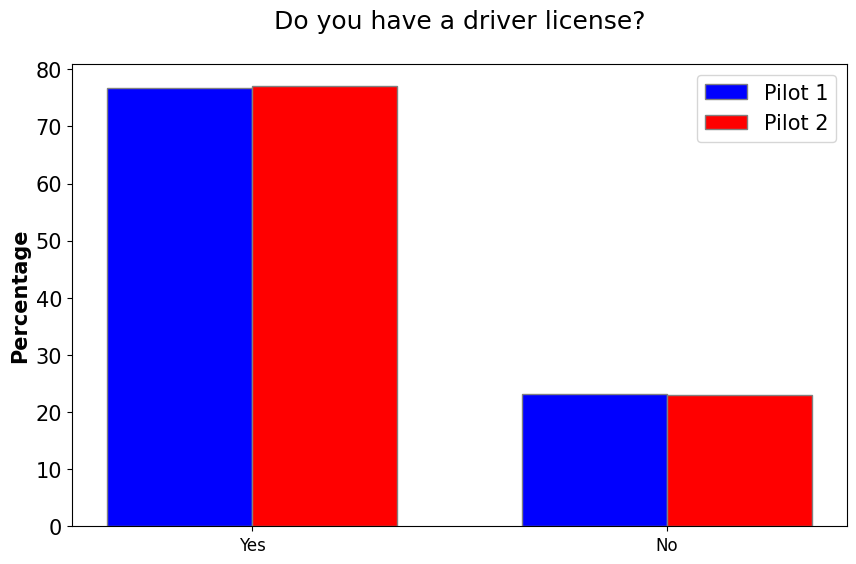

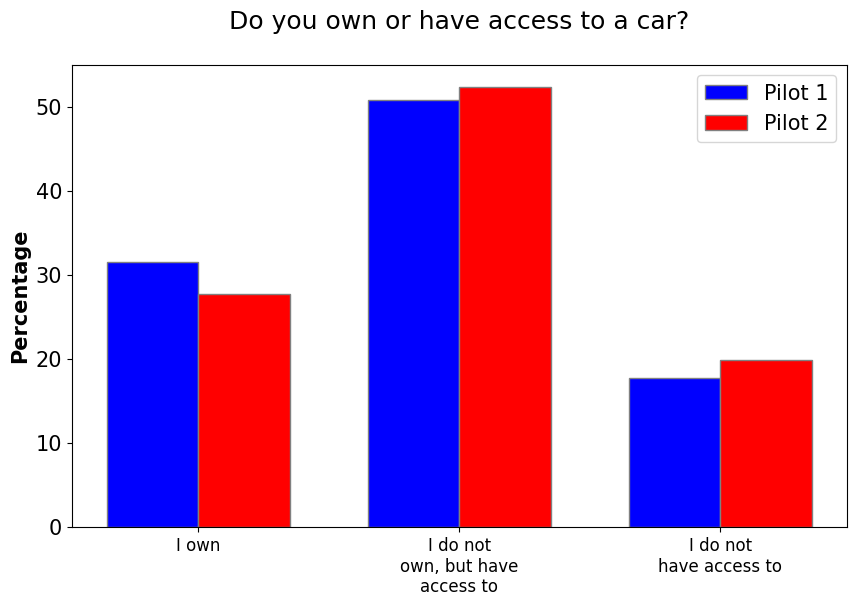

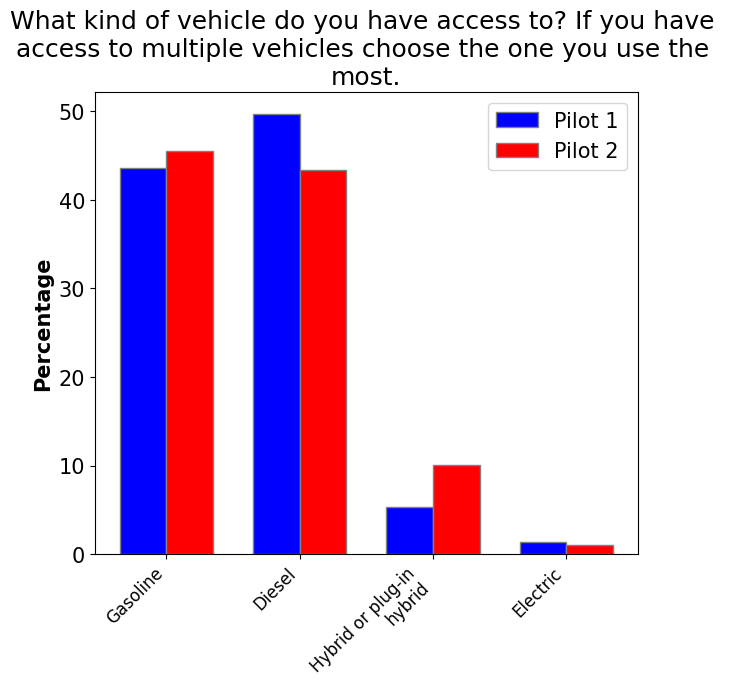

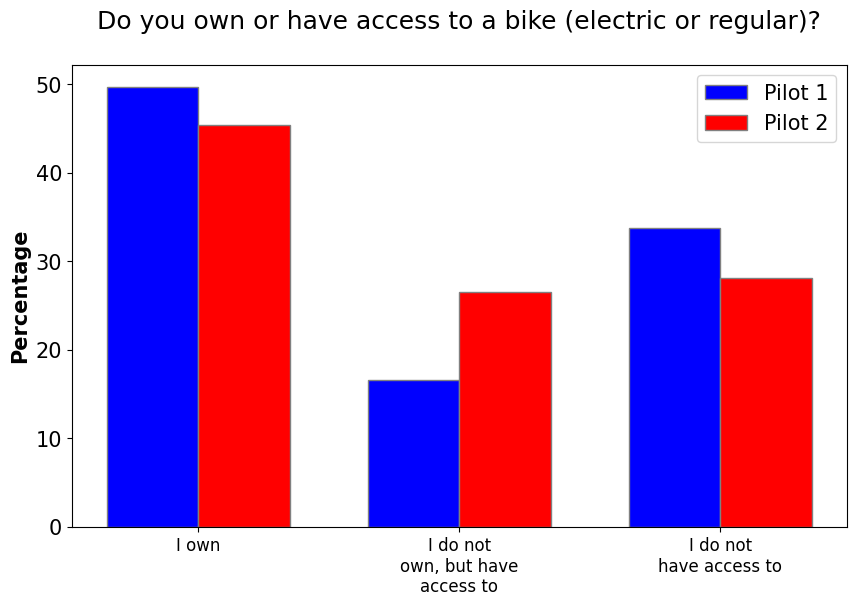

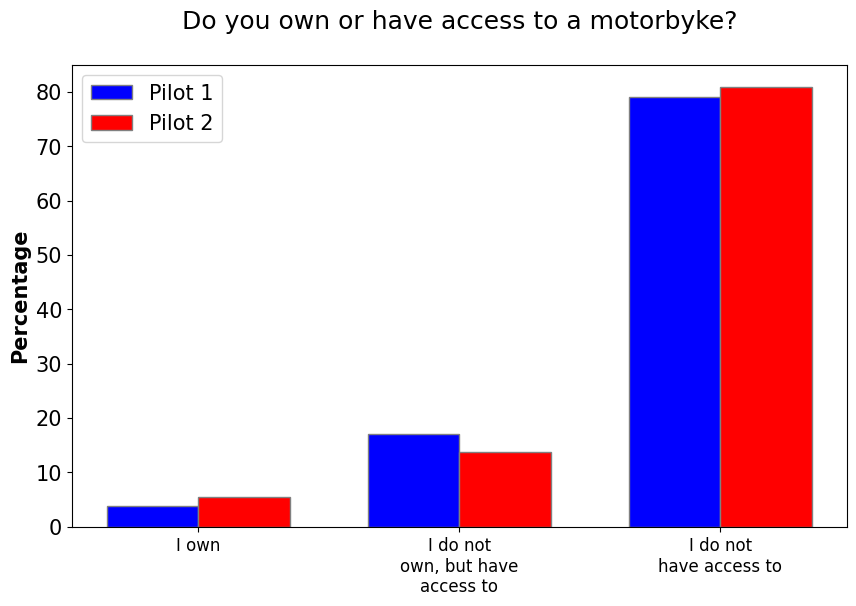

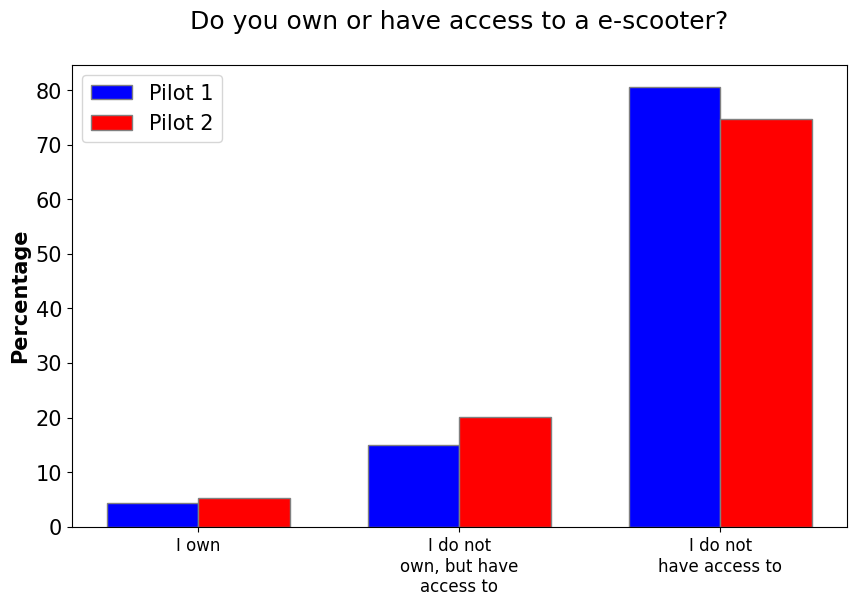

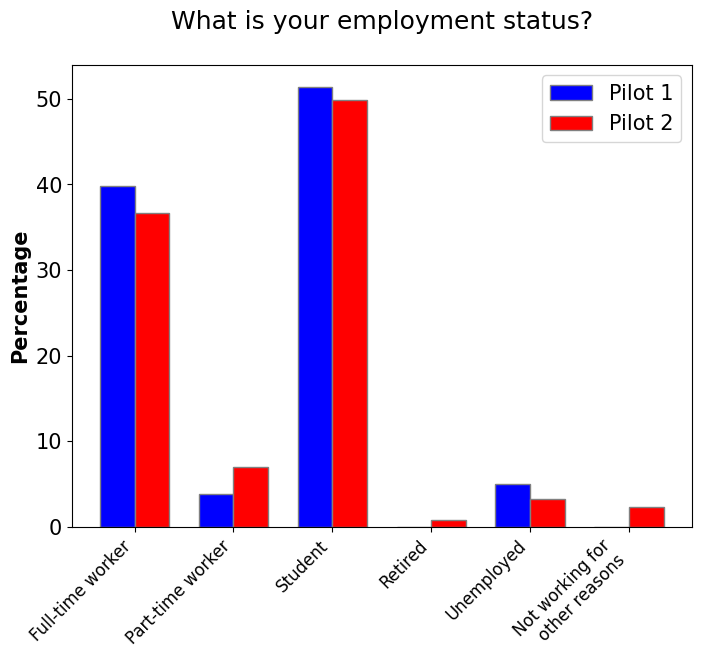

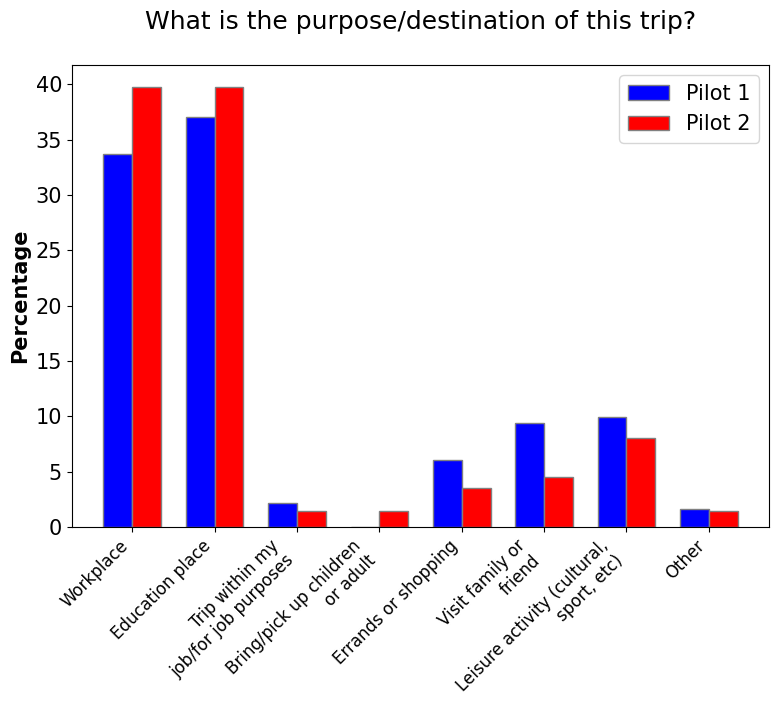

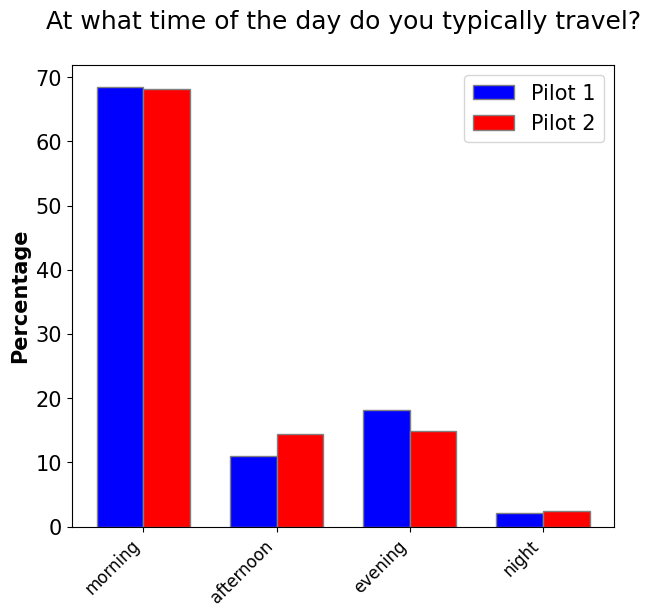

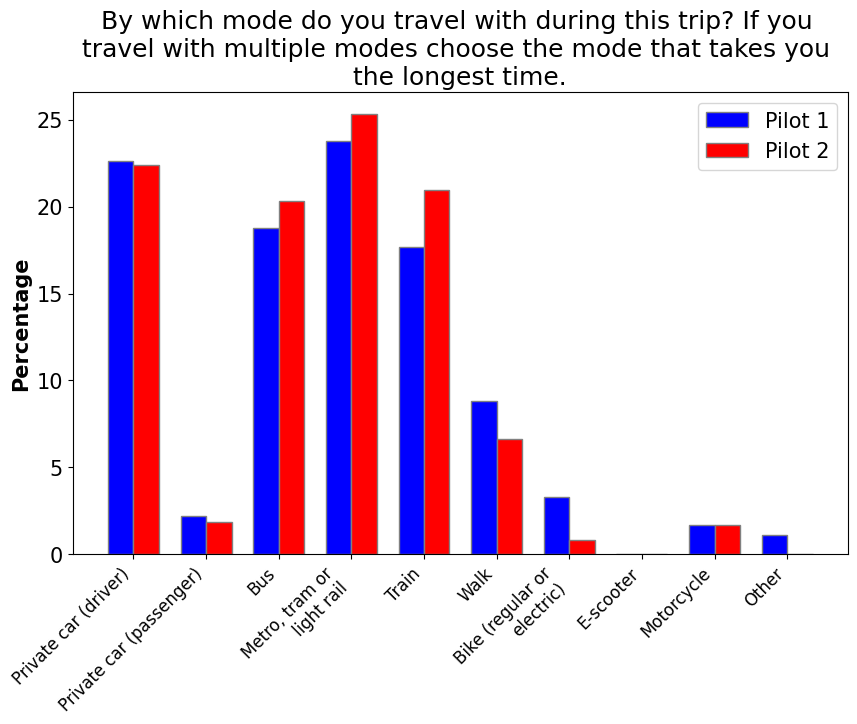

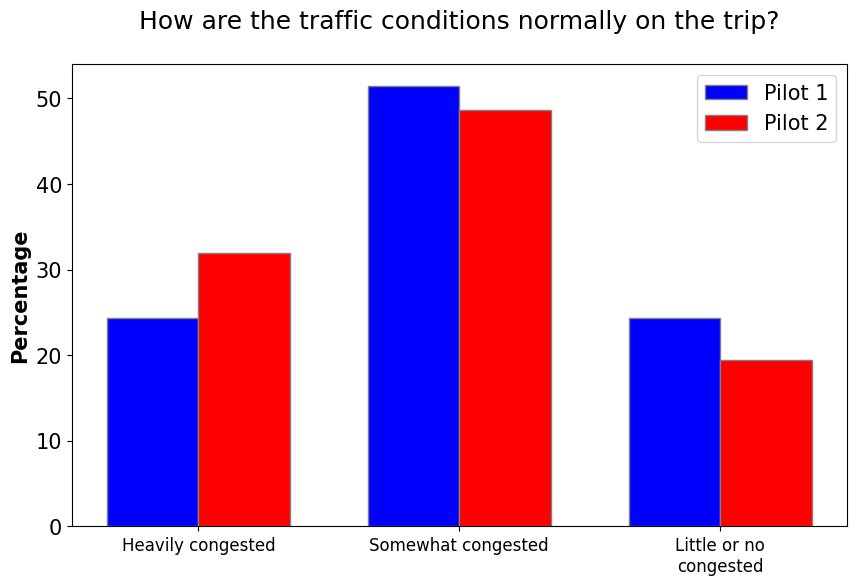

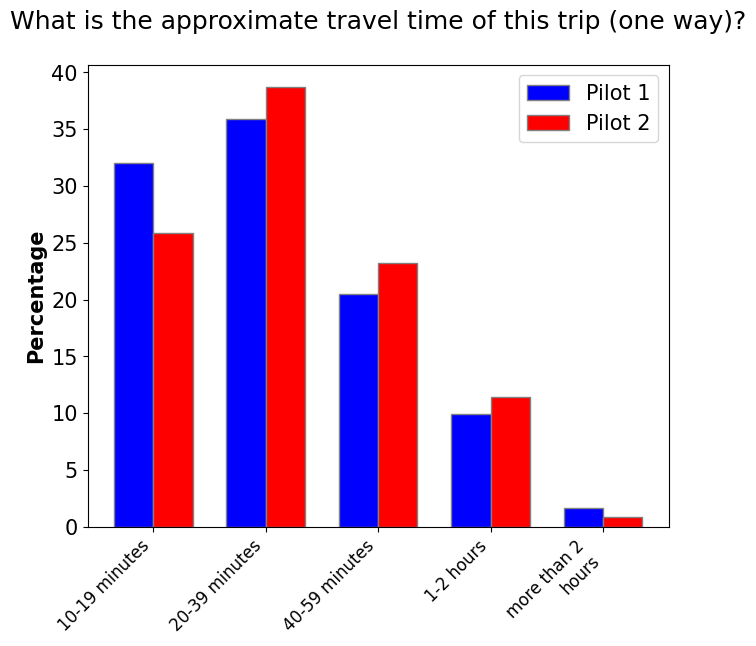

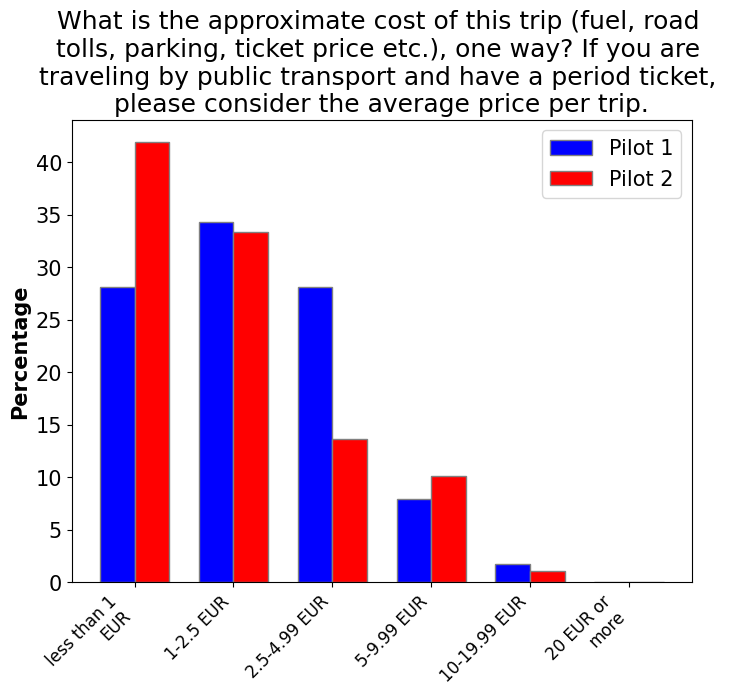

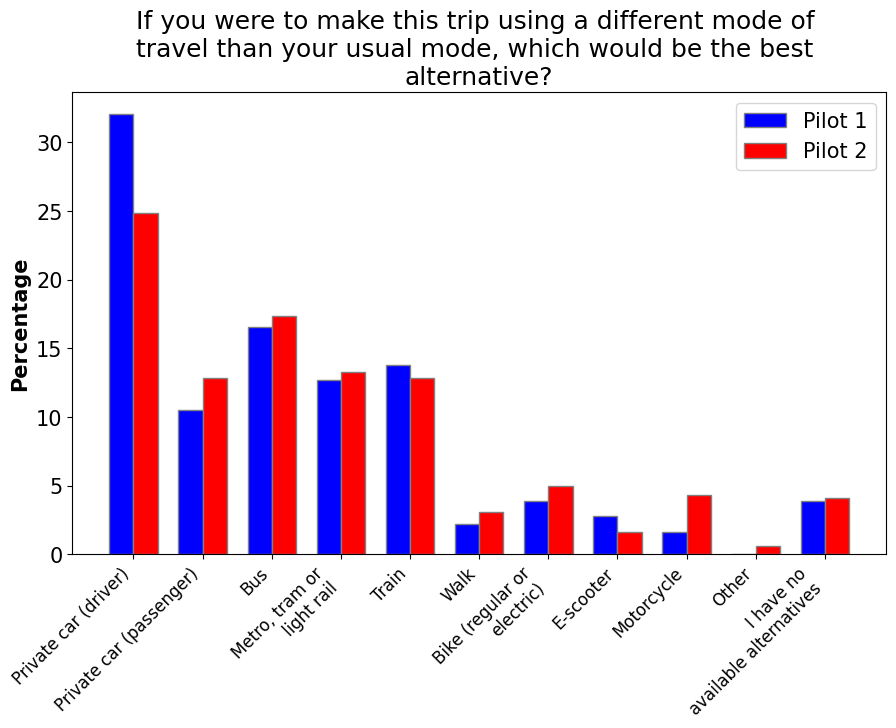

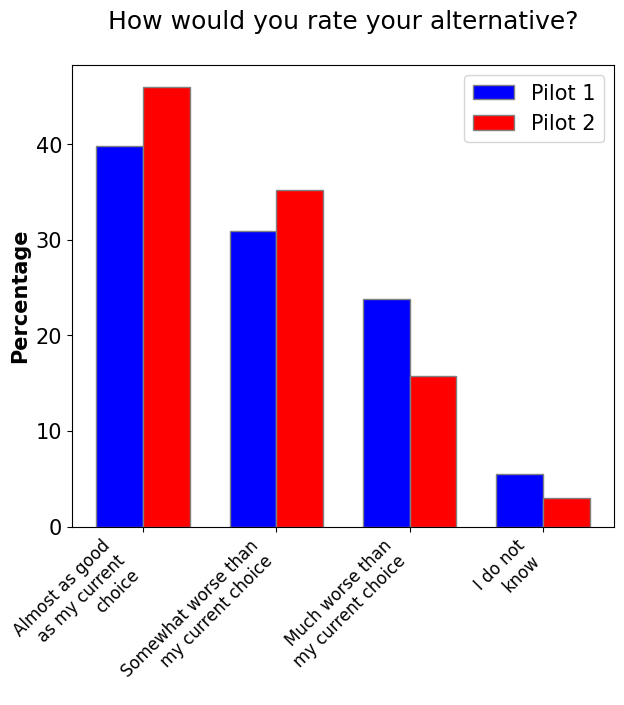

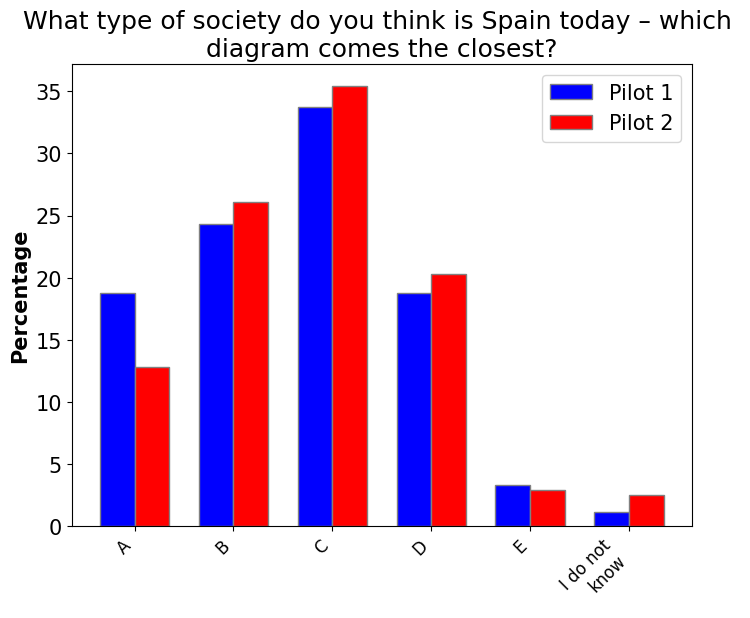

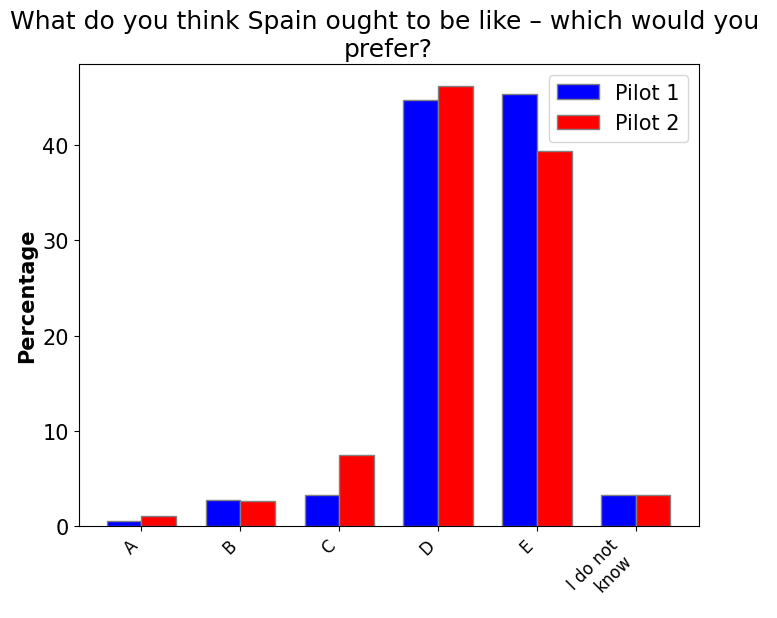

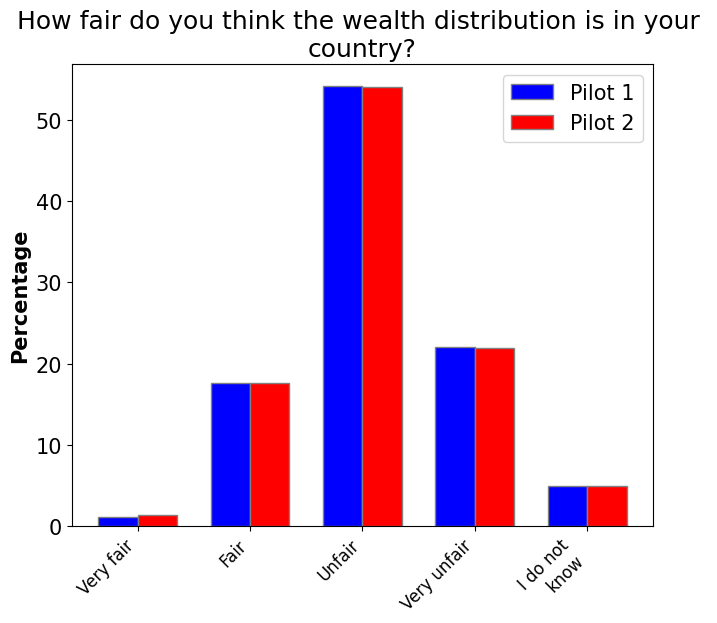

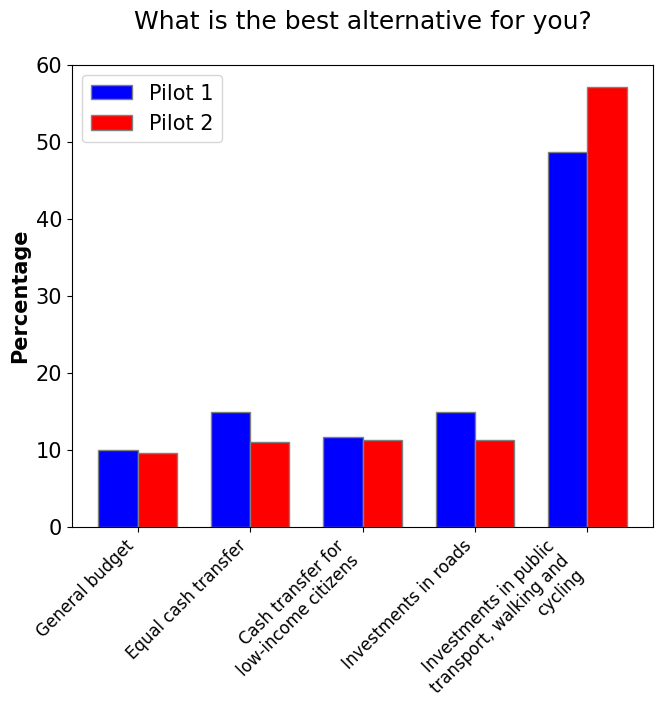

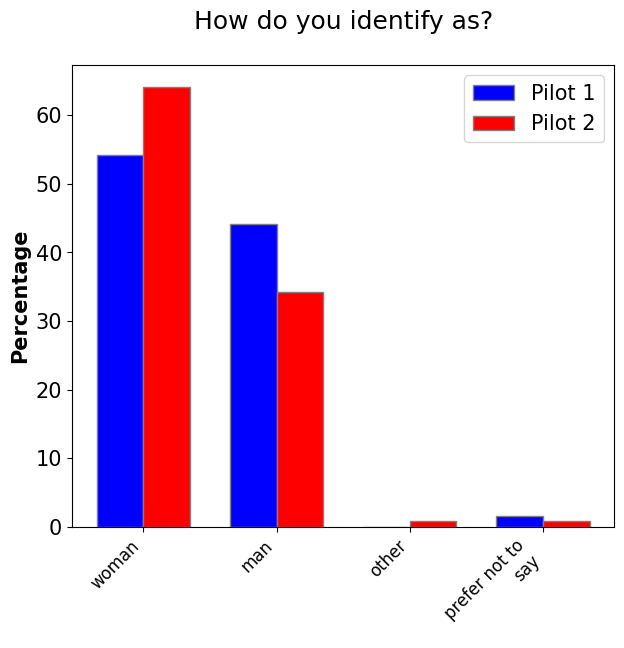

AttributeError: 'int' object has no attribute 'split'

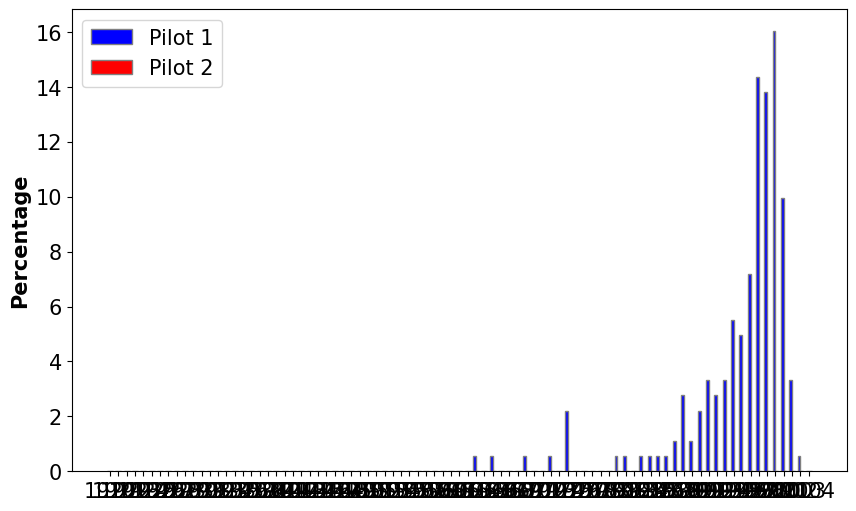

In [13]:
# Create bar plots for each question
for question, categories in questions.items():
    # Calculate percentage of responses for each dataframe
    df1_percentage = calculate_percentage(df1, question, categories)
    df2_percentage = calculate_percentage(df2, question, categories)
    
    # Combine the percentages into a single DataFrame
    combined_df = pd.DataFrame({'Pilot 1': df1_percentage, 'Pilot 2': df2_percentage}).fillna(0)
    
    # Set the width of the bars
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(combined_df.index))
    r2 = [x + bar_width for x in r1]
    
    # Create the bar plot
    # Adjust the size of the plot according to the number of xticks
    plt.figure(figsize=(10, 6))
    plt.bar(r1, combined_df['Pilot 1'], color='blue', width=bar_width, edgecolor='grey', label='Pilot 1')
    plt.bar(r2, combined_df['Pilot 2'], color='red', width=bar_width, edgecolor='grey', label='Pilot 2')
    
    # Add labels
    plt.ylabel('Percentage', fontweight='bold', fontsize=15)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], combined_df.index, fontsize=15)
    plt.yticks(fontsize=15)
    
    # Add legend
    plt.legend(fontsize=15) 

    wrapped_labels = wrap_labels(combined_df.index)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], wrapped_labels, fontsize=12)

    # Adjust the size of xticks to avoid overlap
    if len(combined_df.index) > 3:
        plt.xticks(rotation=45, ha='right')
        plt.gcf().set_size_inches(len(combined_df.index) * 0.5 + 5, 6)
    else:
        plt.xticks(rotation=0)

    #plt.ylim(0, 100)
    
    plt.title(wrap_title(question + '\n'), fontsize=18)
    plt.show()

In [ ]:
df2

In [ ]:
column= "Which year were you born?"
n, x_a, _ = plt.hist(df1[column],bins=30,density=True, label='Set B', color='moccasin', edgecolor='black')
plt.title(column)
plt.show()

c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

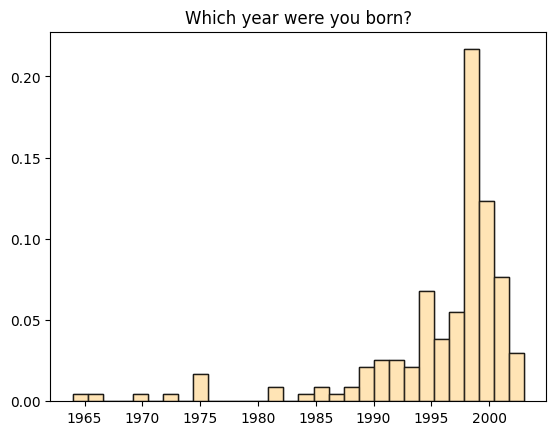

In [19]:
column= "Which year were you born?"
n, x_a, _ = plt.hist(df1[column],bins=30,density=True, label='Set B', color='moccasin', edgecolor='black')
plt.title(column)
# Plot histogram for df1
n, x_a, _ = plt.hist(df1[column], bins=30, density=True, alpha=0.5, label='Pilot 1', color='moccasin', edgecolor='black')

# Plot histogram for df2
n2, x_a2, _ = plt.hist(df2[column], bins=30, density=True, alpha=0.5, label='Pilot 2', color='skyblue', edgecolor='black')

plt.legend()
plt.show()

In [ ]:
df2

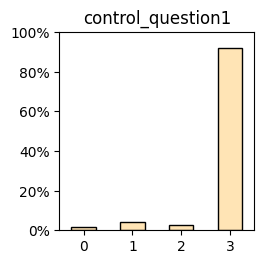

In [ ]:
#control question

column= 'control_question1'
tab=df1.groupby([column]).count()*100/num_participants
#df1=df1.rename(columns={'Do you own or have access to a motorbyke?':'Do you own or have access\n to a motorbike?'})
#tab=tab.loc[['Almost as good as my current choice','Somewhat worse than my current choice','Much worse than my current choice','I do not know']]
#tab=tab.rename(index={'Almost as good as my current choice':'Almost as good as\n my current choice','Somewhat worse than my current choice':'Somewhat worse than\n my current choice','Much worse than my current choice':'Much worse than\n my current choice'})

ax=tab.plot(kind='bar', y=1, title = column, figsize=(3,3), color='moccasin', edgecolor='k', legend=False)
plt.ylim([0,100])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\control.png')
plt.show()

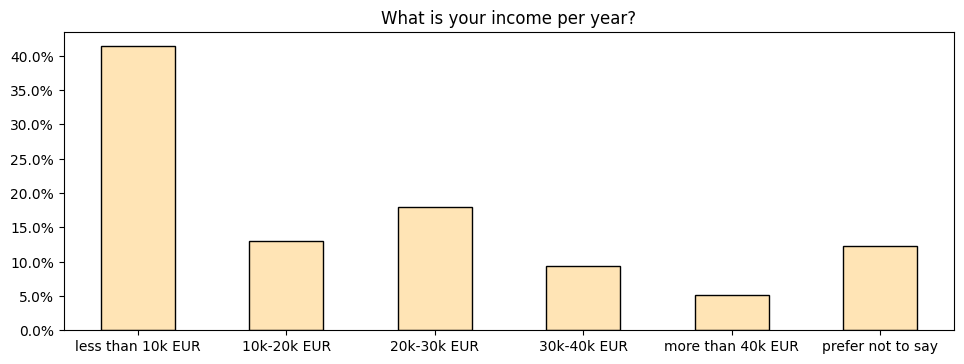

In [ ]:
column= 'What is your income per year?'
tab=df1.groupby([column]).count()*100/num_participants
#df1=df1.rename(columns={'Do you own or have access to a motorbyke?':'Do you own or have access\n to a motorbike?'})
tab=tab.loc[['less than 10k EUR','10k-20k EUR','20k-30k EUR','30k-40k EUR','more than 40k EUR','prefer not to say']]
#tab=tab.rename(index={'elementary school':'elementary\n school','high school':'high\n school','university (less than 4 years)':'university (less\n than 4 years)','university (more than 4 years)':'university (more\n than 4 years)'})

ax=tab.plot(kind='bar', y=1, title = column, figsize=(10,4), color='moccasin', edgecolor='k', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.ylim([0,181])
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\income.png')
plt.show()

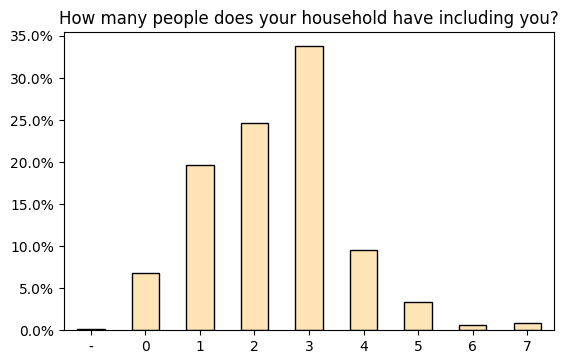

In [ ]:
column= 'How many people does your household have including you?'
tab=df1.groupby([column]).count()*100/num_participants
#df1=df1.rename(columns={'Do you own or have access to a motorbyke?':'Do you own or have access\n to a motorbike?'})
#tab=tab.loc[['woman','man','prefer not to say']]
#tab=tab.rename(index={'elementary school':'elementary\n school','high school':'high\n school','university (less than 4 years)':'university (less\n than 4 years)','university (more than 4 years)':'university (more\n than 4 years)'})

ax=tab.plot(kind='bar', y=1, title = column, figsize=(6,4), color='moccasin', edgecolor='k', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.ylim([0,181])
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\number_people.png')
plt.show()

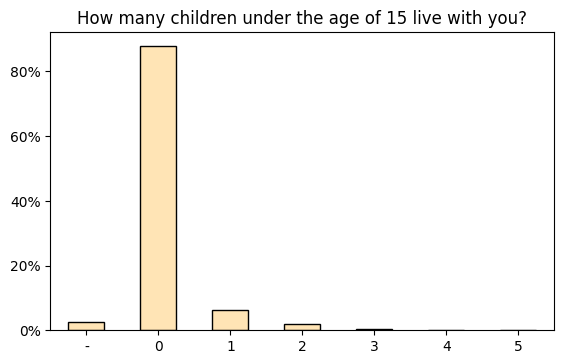

In [ ]:
column= 'How many children under the age of 15 live with you?'
tab=df1.groupby([column]).count()*100/num_participants
#df1=df1.rename(columns={'Do you own or have access to a motorbyke?':'Do you own or have access\n to a motorbike?'})
#tab=tab.loc[['woman','man','prefer not to say']]
#tab=tab.rename(index={'elementary school':'elementary\n school','high school':'high\n school','university (less than 4 years)':'university (less\n than 4 years)','university (more than 4 years)':'university (more\n than 4 years)'})

ax=tab.plot(kind='bar', y=1, title = column, figsize=(6,4), color='moccasin', edgecolor='k', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.ylim([0,181])
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\child.png')
plt.show()

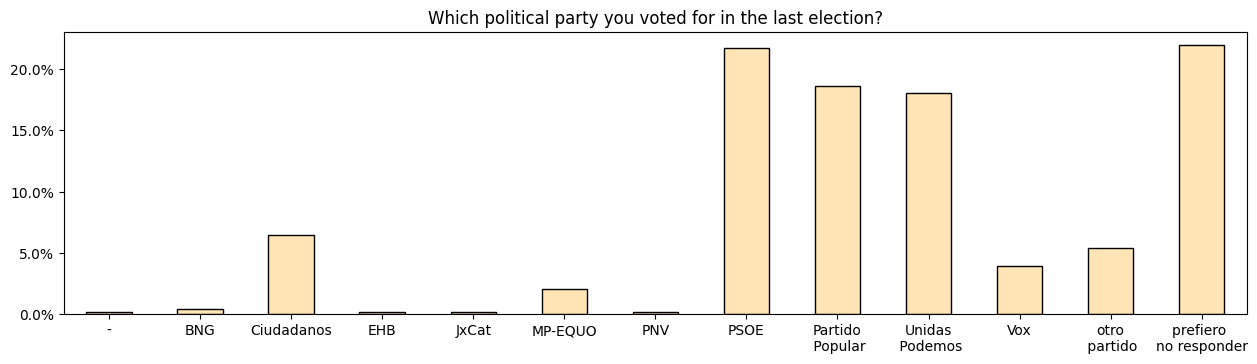

In [ ]:
column= 'Which political party you voted for in the last election?'
tab=df1.groupby([column]).count()*100/num_participants
#df1=df1.rename(columns={'Do you own or have access to a motorbyke?':'Do you own or have access\n to a motorbike?'})
#tab=tab.loc[['PSOE','Partido Popular','Vox','Unidas Podemos','ERC-Cat','Ciudadanos','JxCat','PNV','EHB','MP-EQUO','BNG','Compromís','otro partido','prefiero no responder']]
tab=tab.rename(index={'Partido Popular':'Partido\n Popular','Unidas Podemos':'Unidas\n Podemos','otro partido':'otro\n partido','prefiero no responder':'prefiero \nno responder'})

ax=tab.plot(kind='bar', y=1, title = column, figsize=(13,4), color='moccasin', edgecolor='k', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.ylim([0,181])
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\vote.png')
plt.show()

## All plots

Some alternatives on x-axis are not in logical order

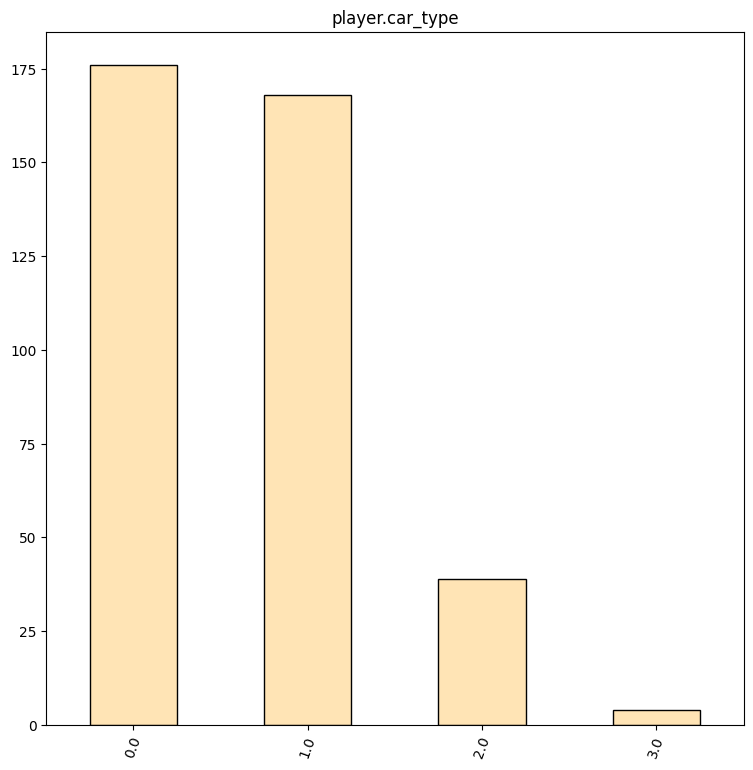

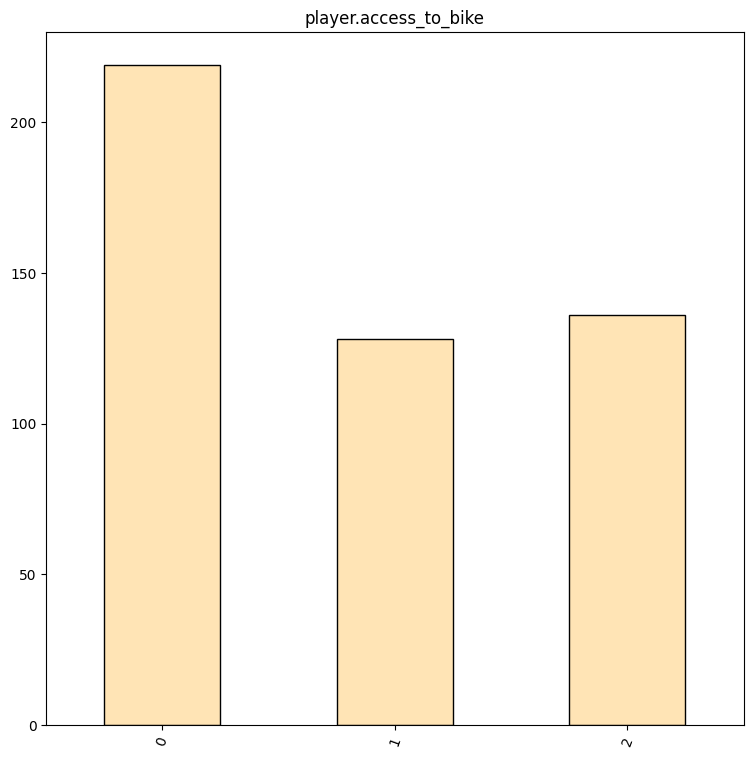

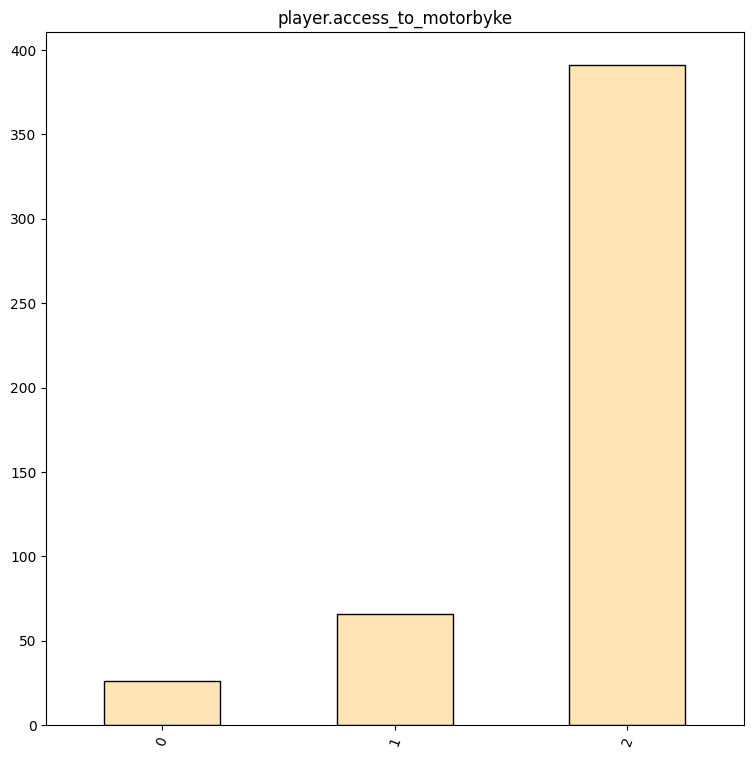

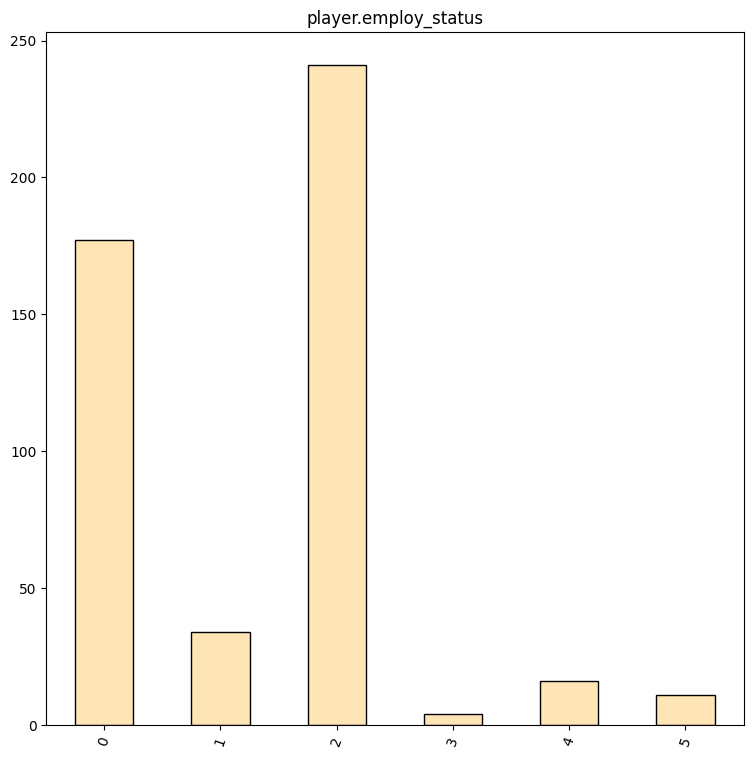

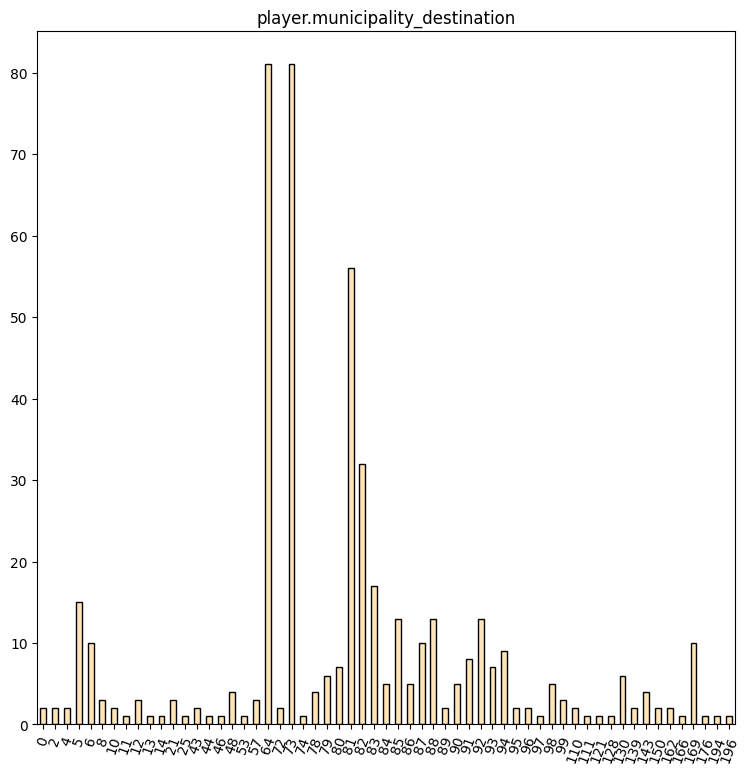

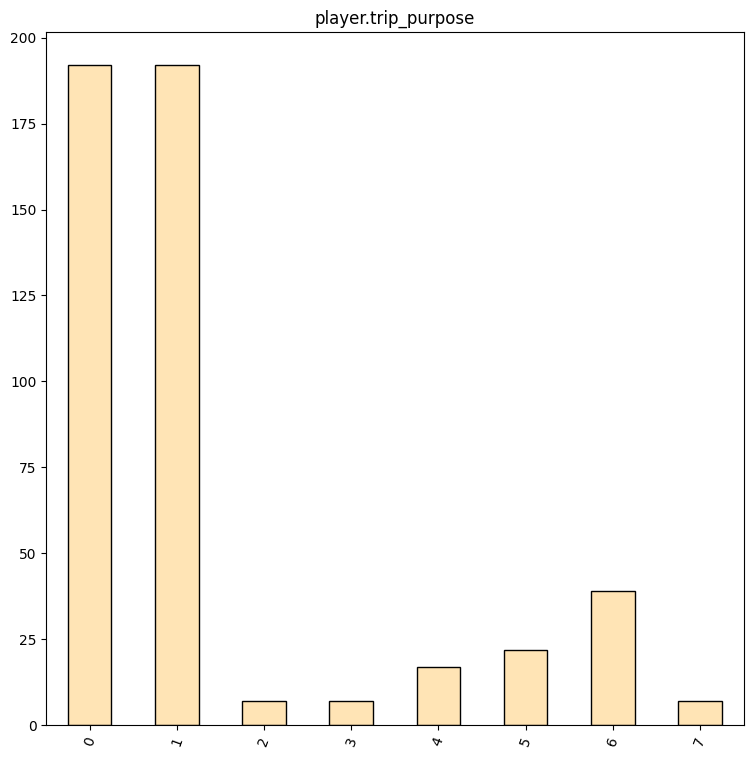

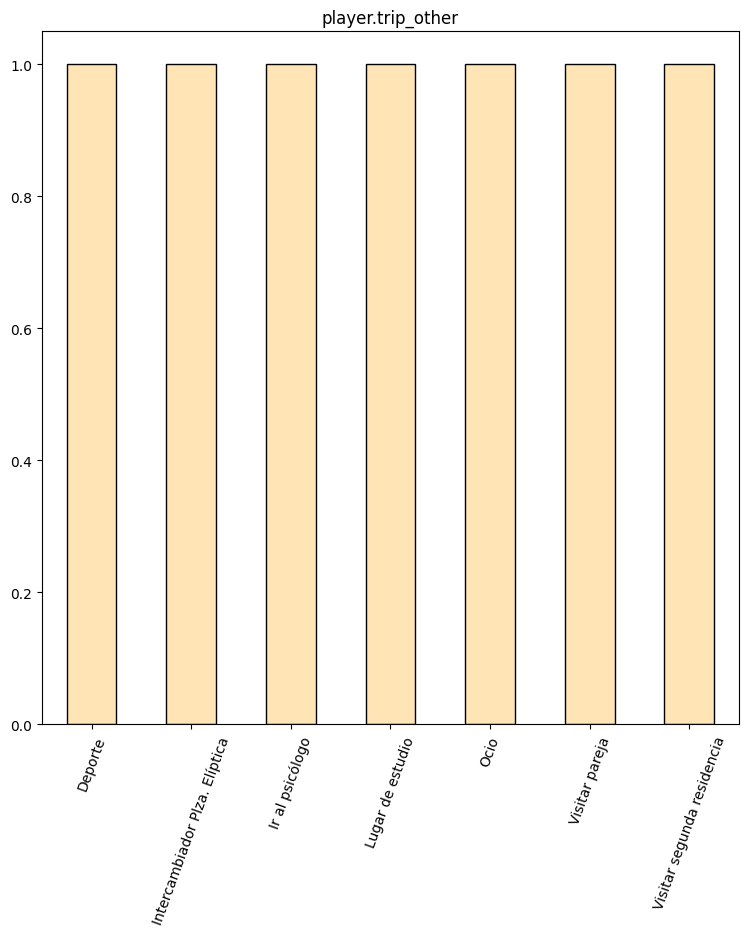

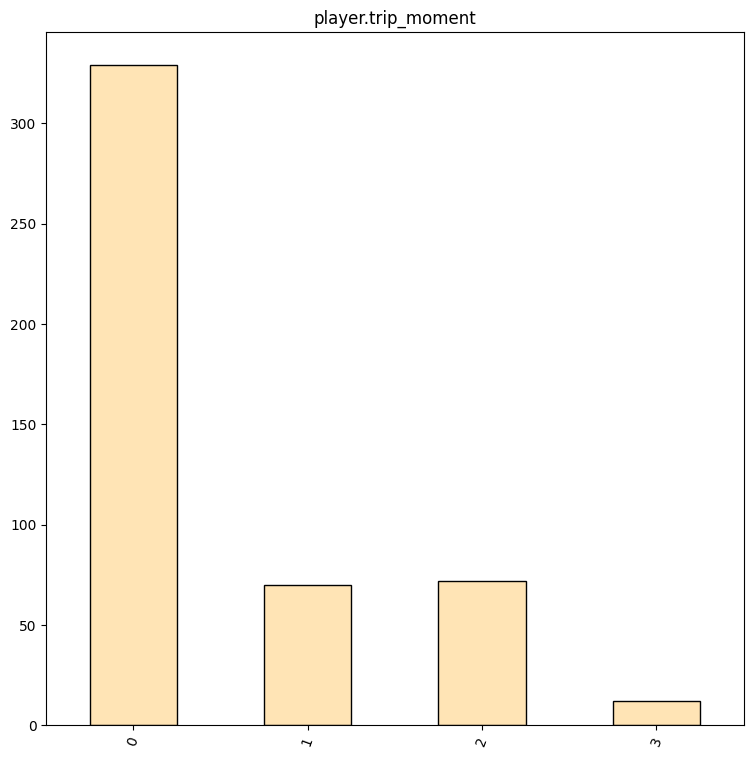

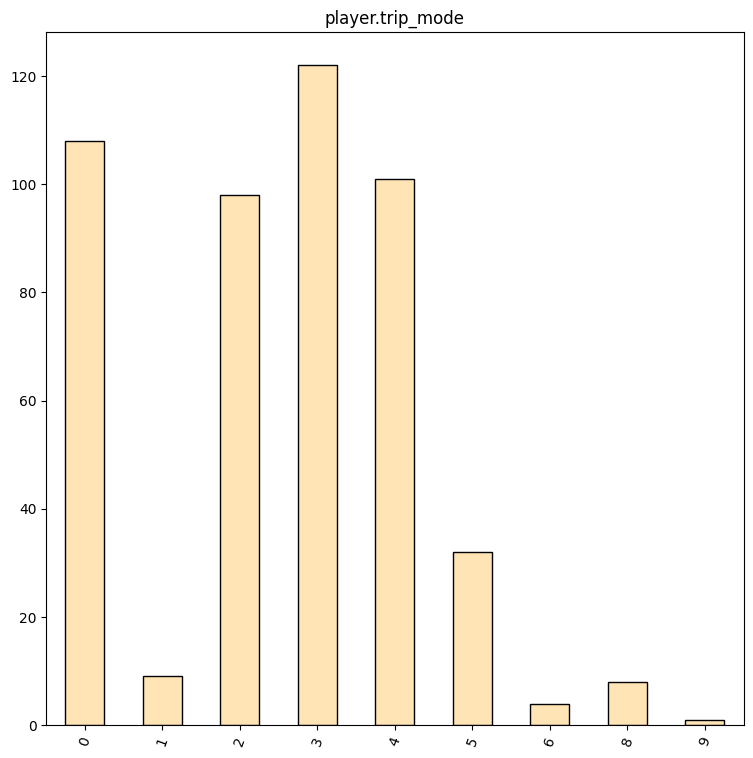

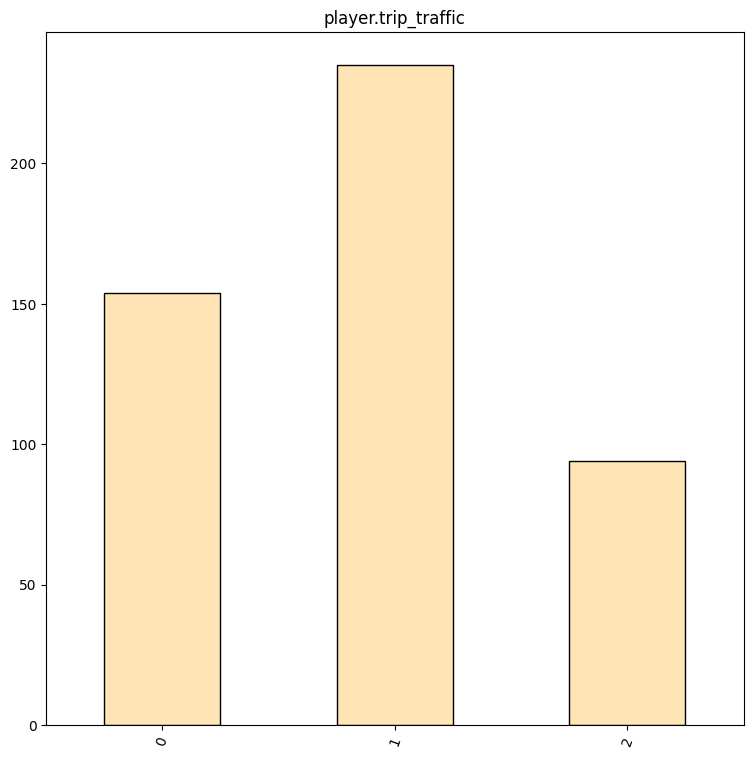

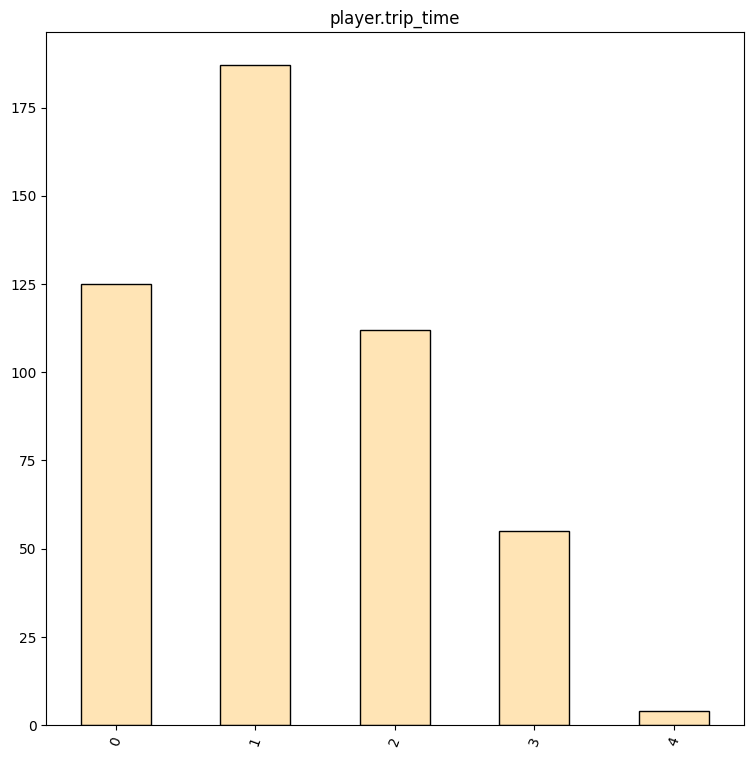

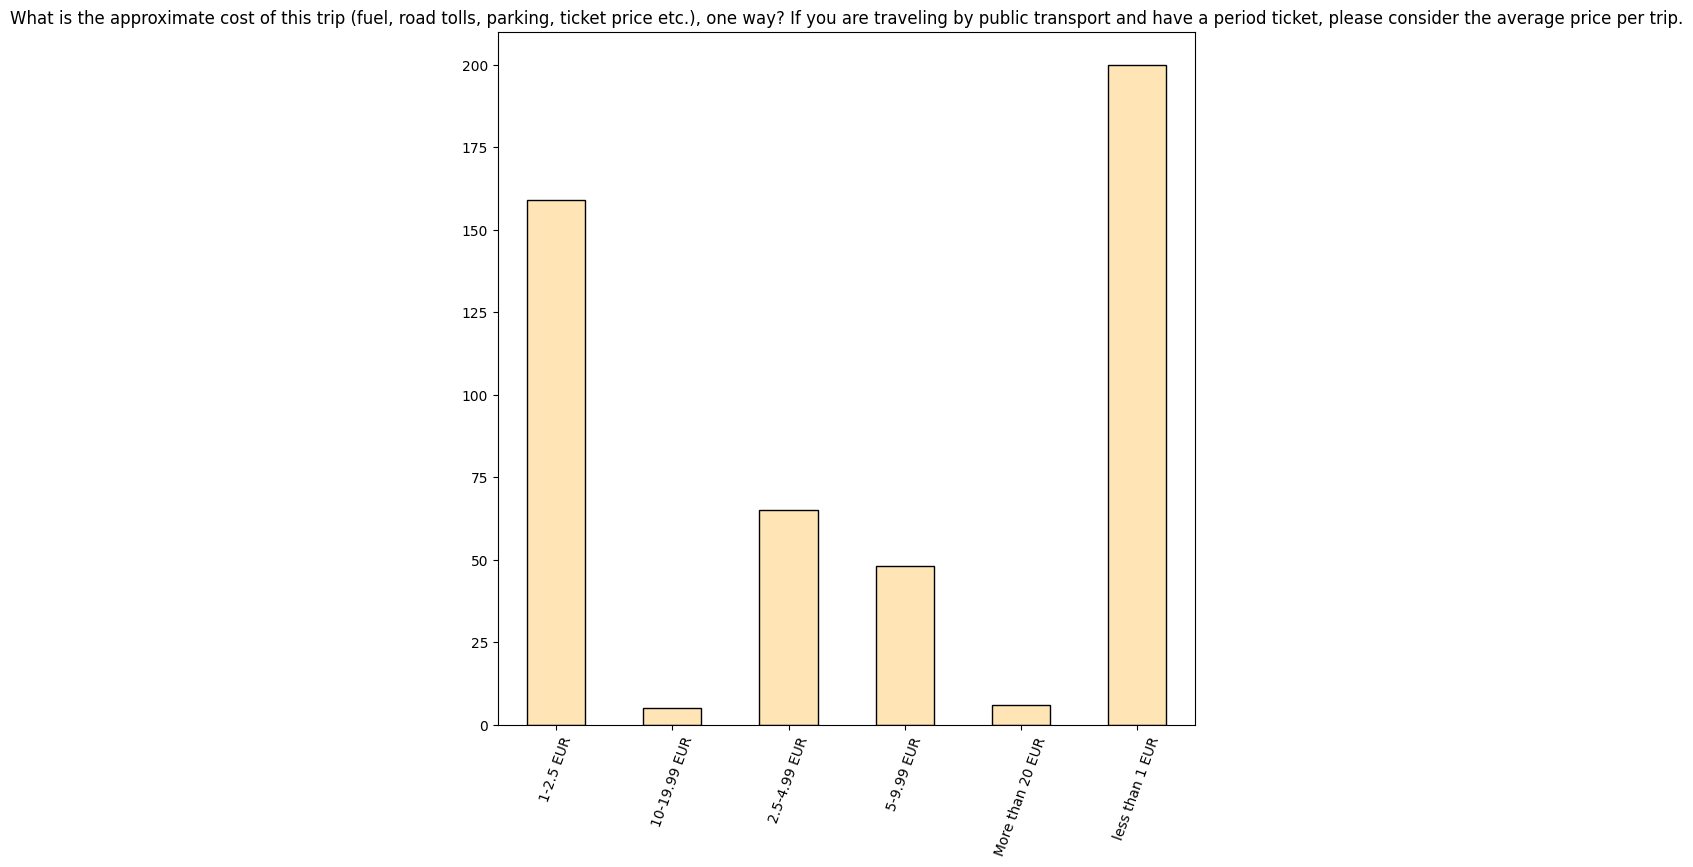

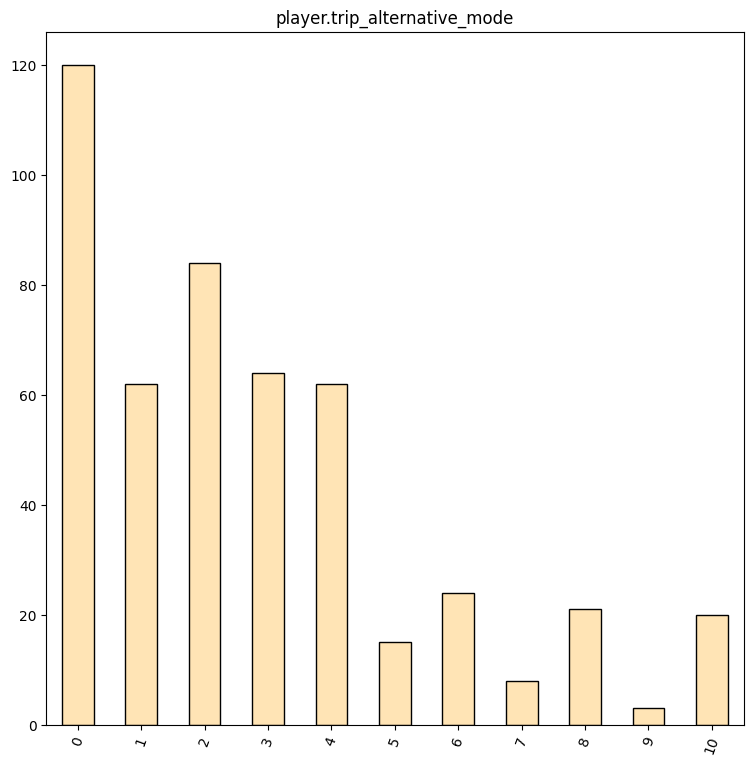

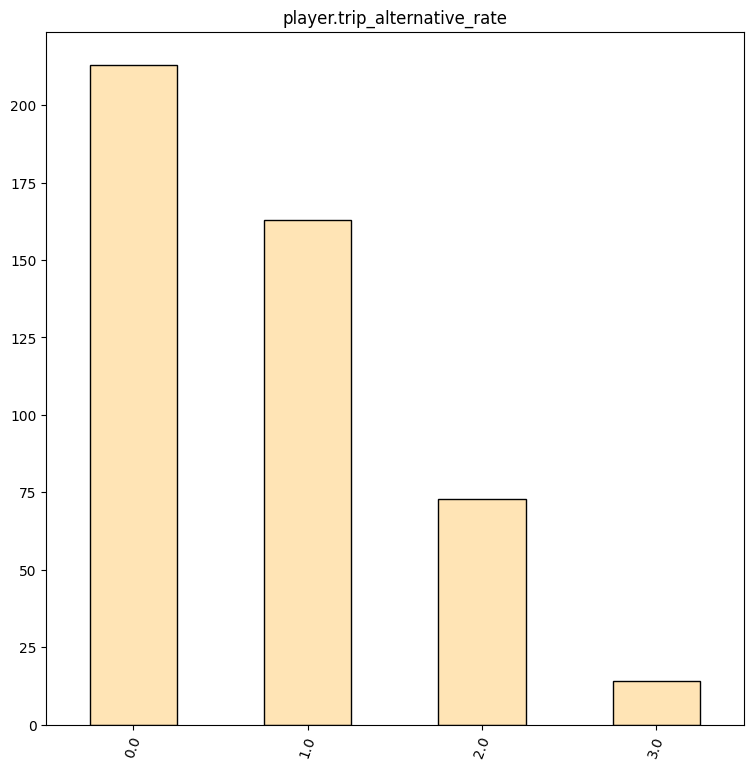

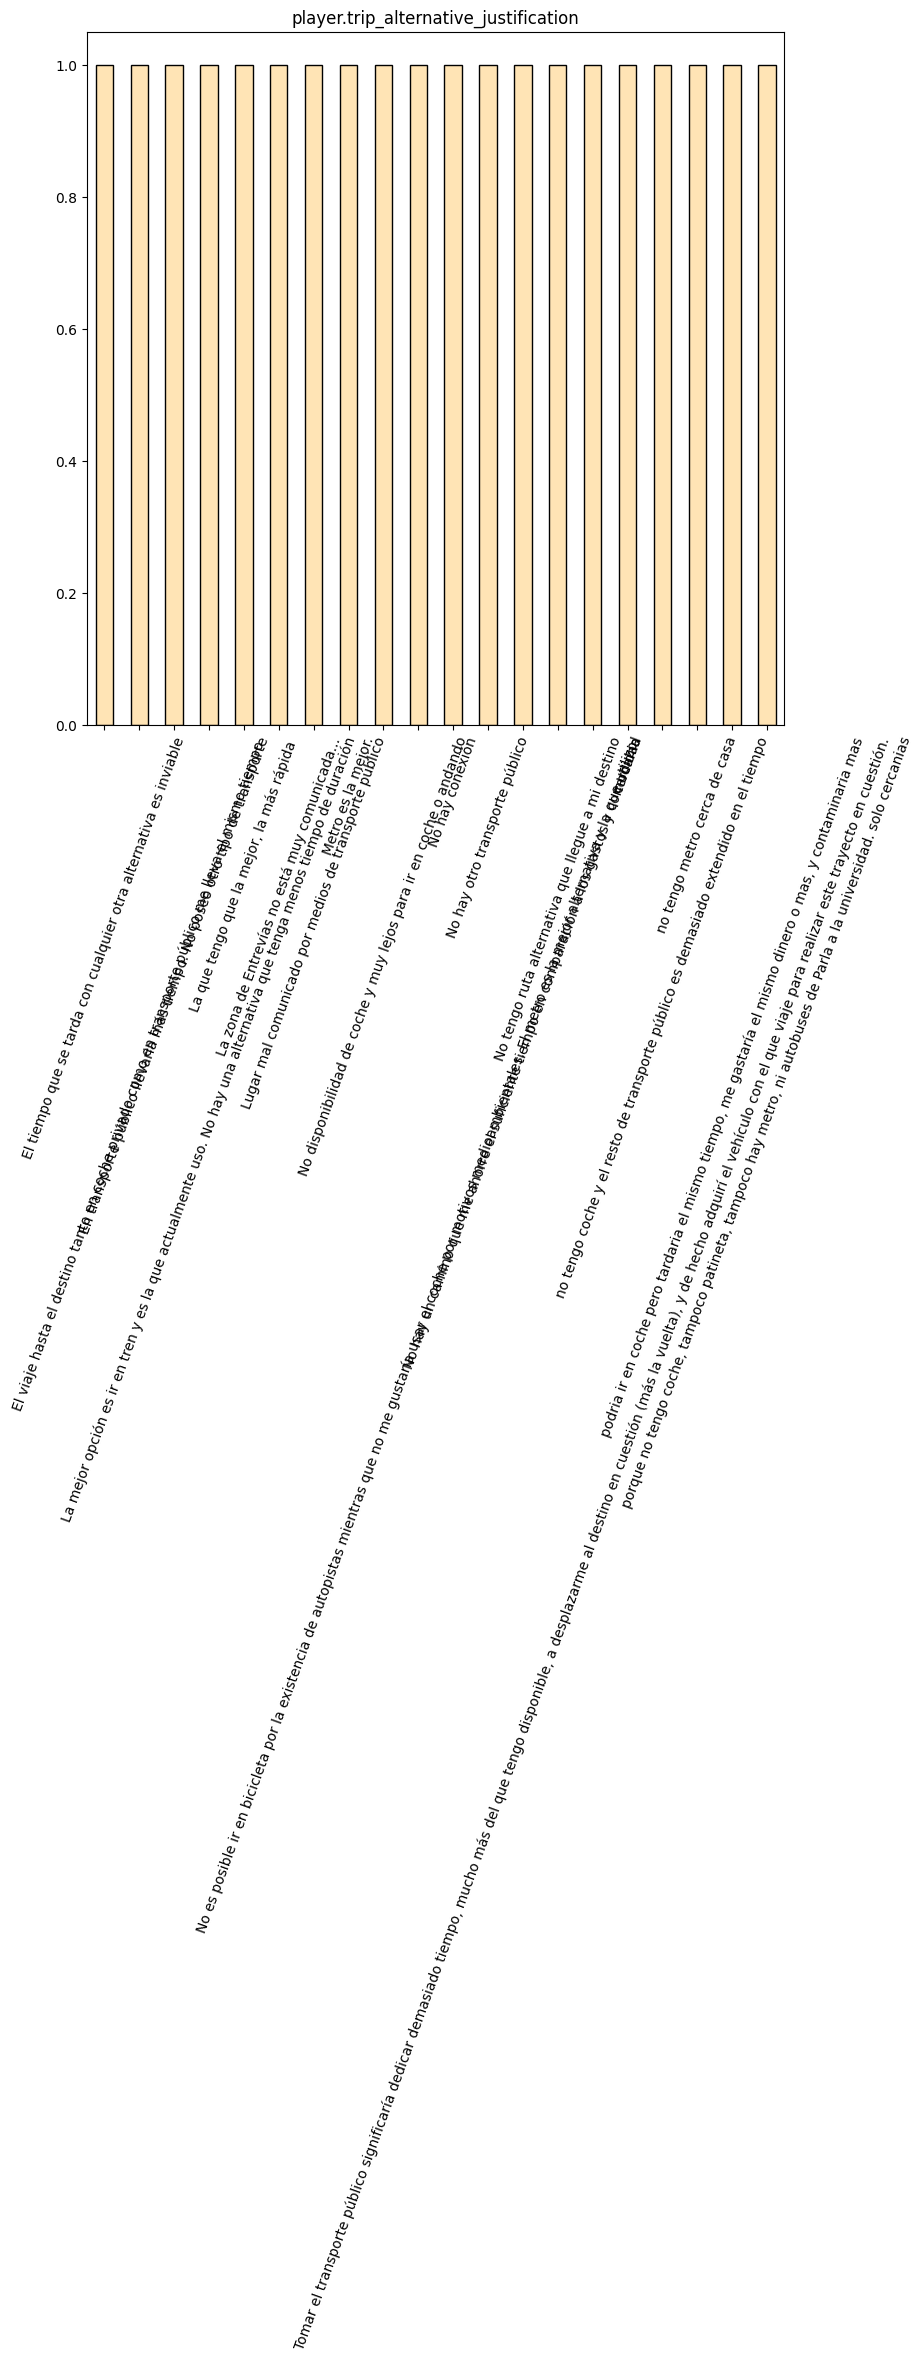

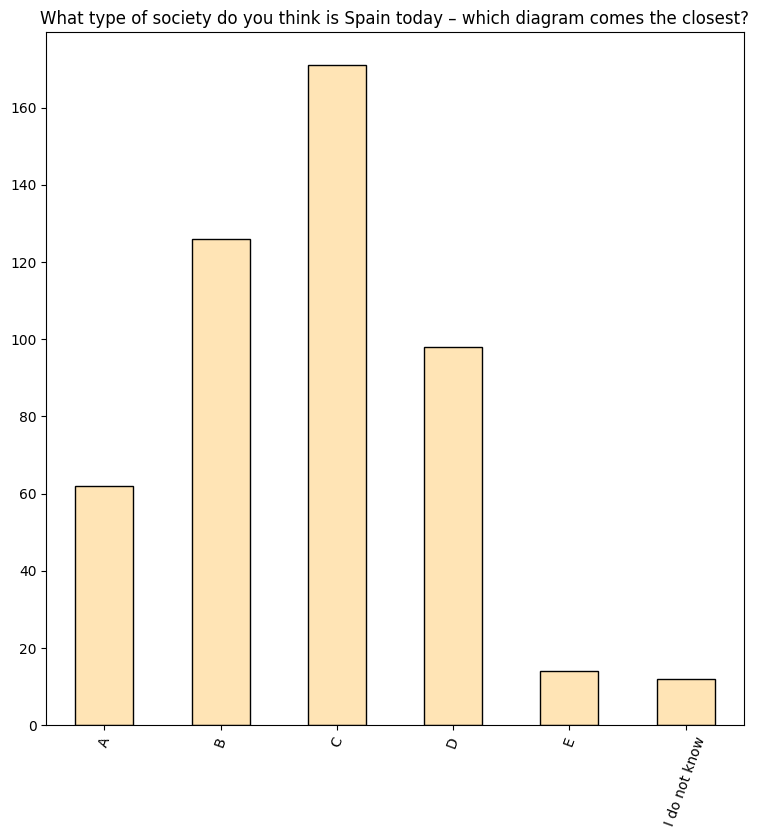

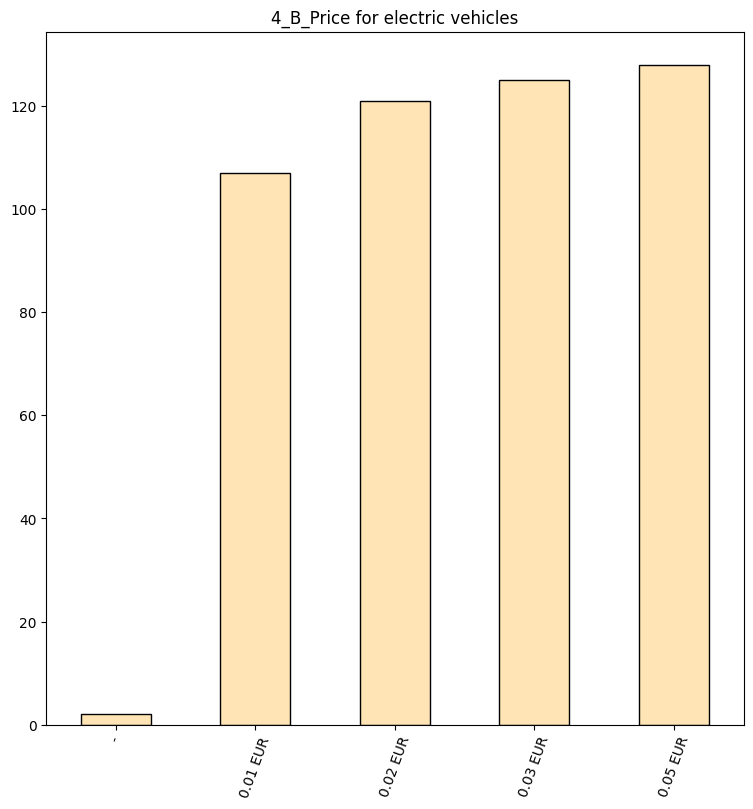

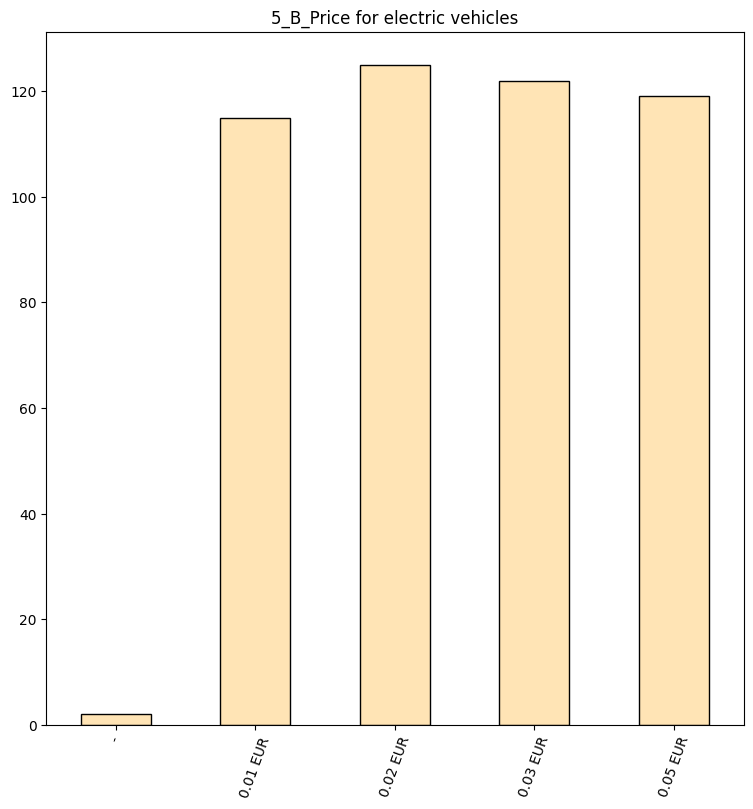

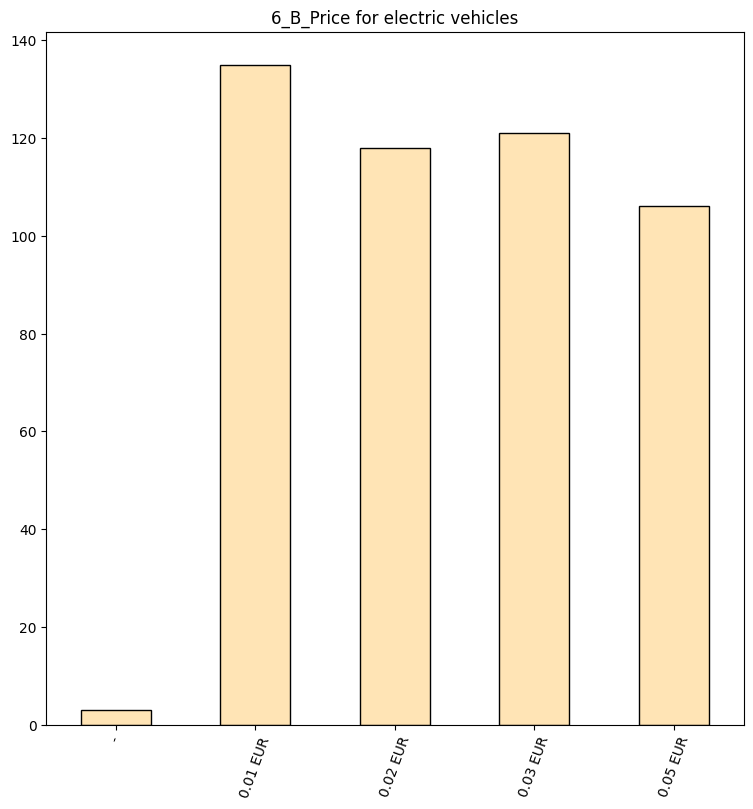

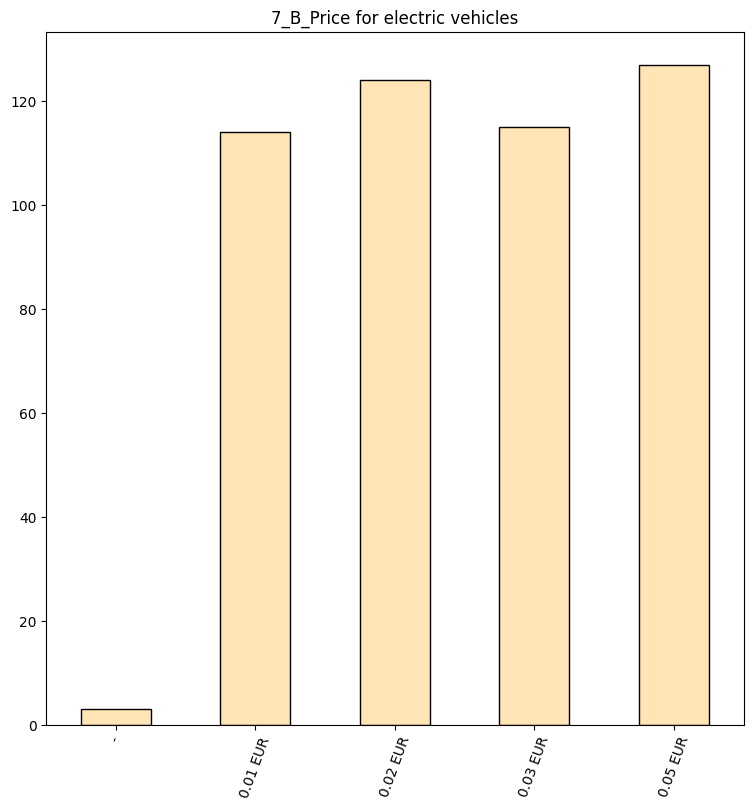

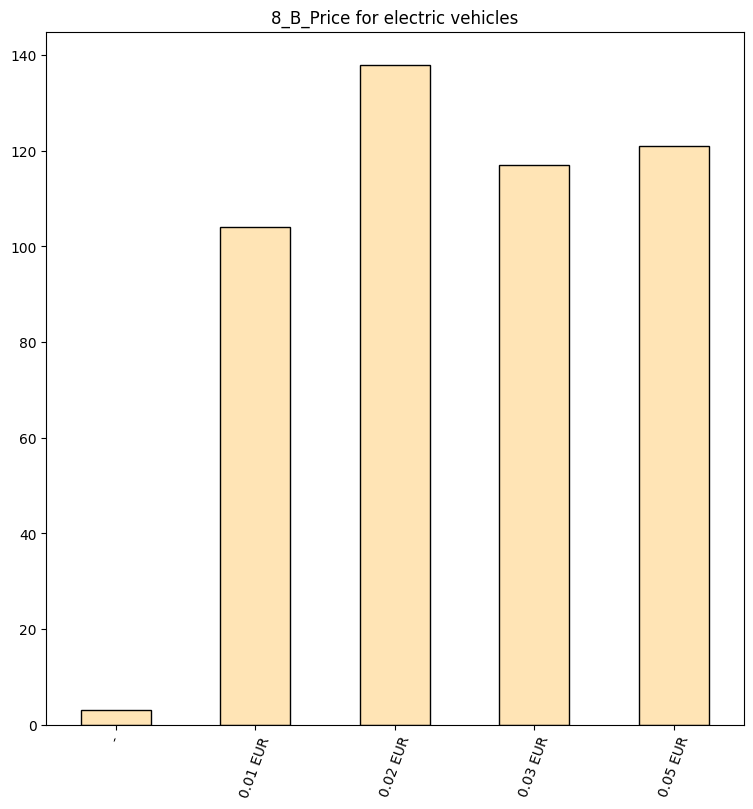

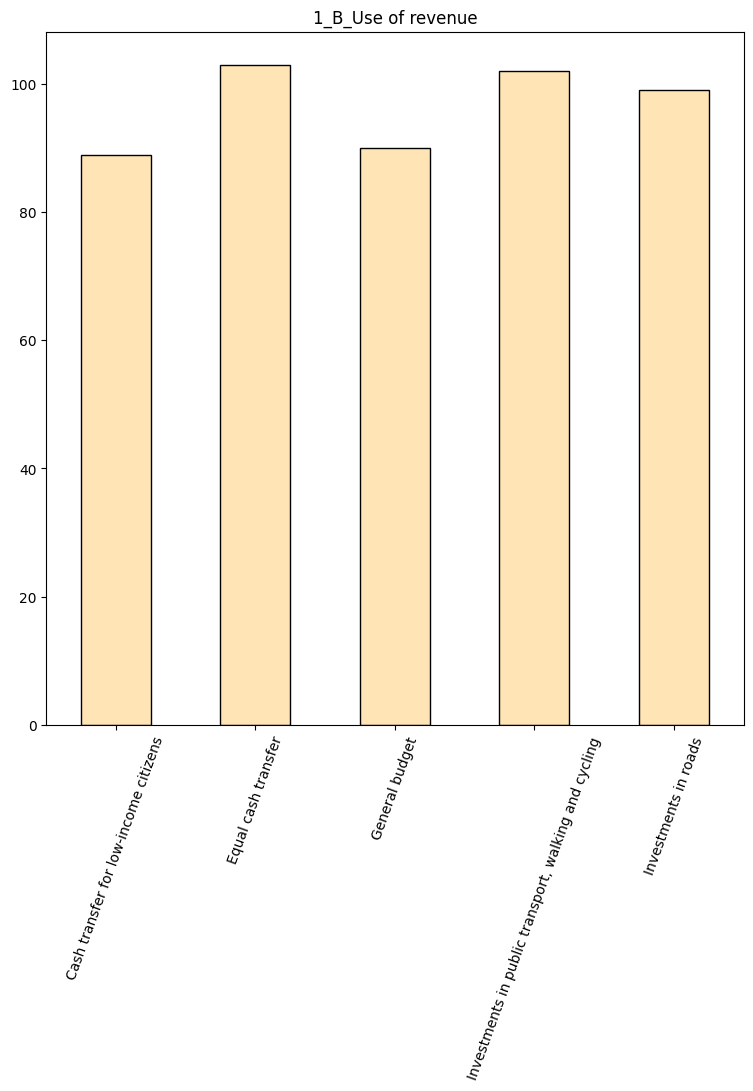

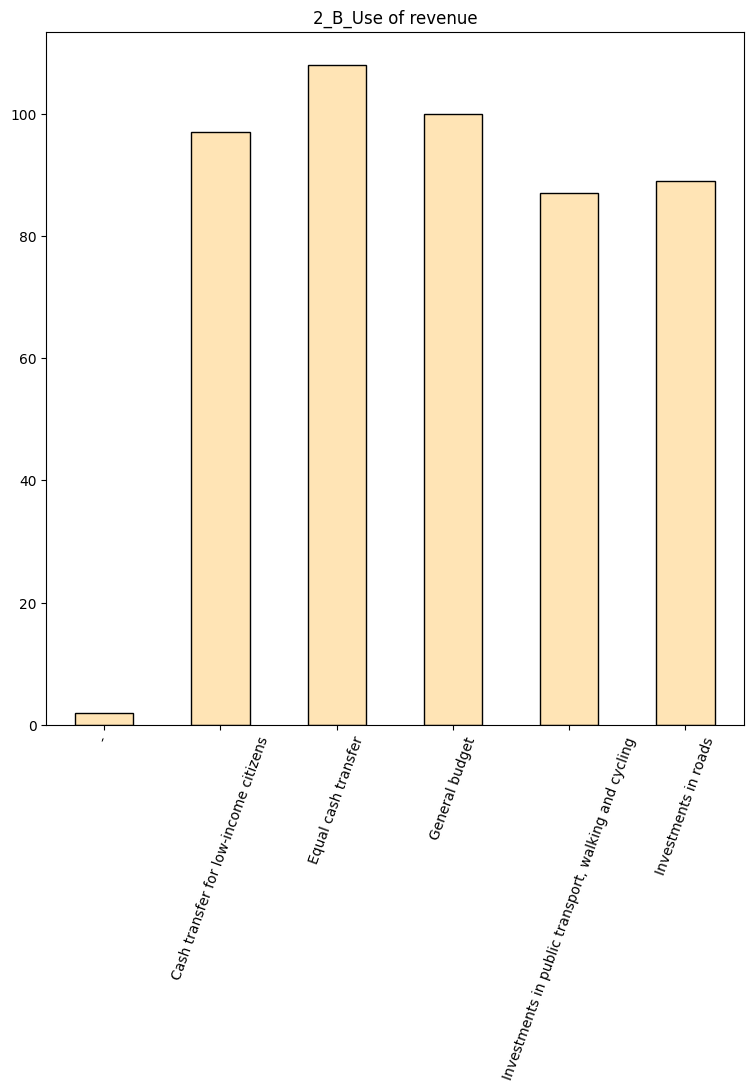

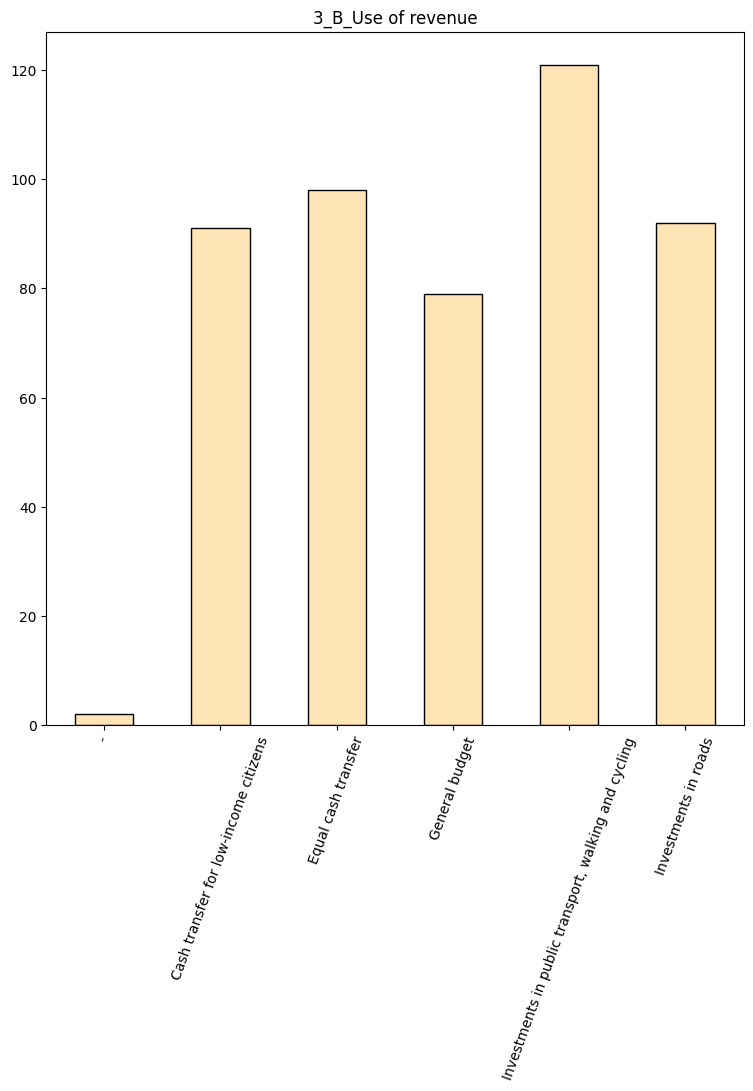

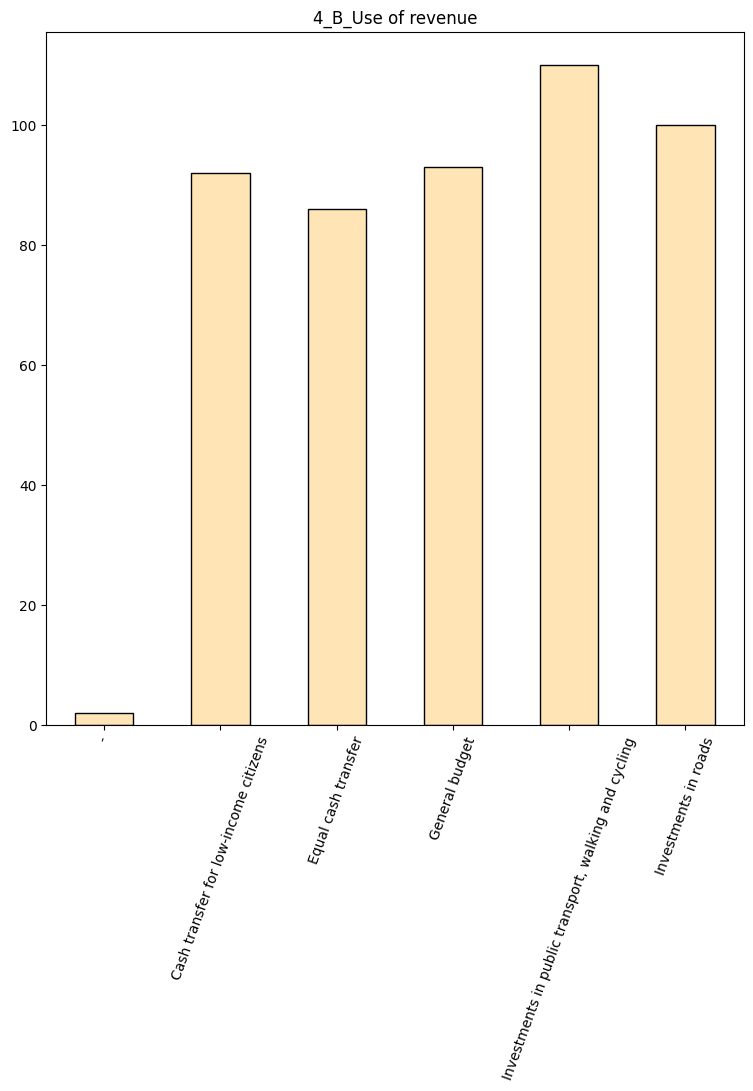

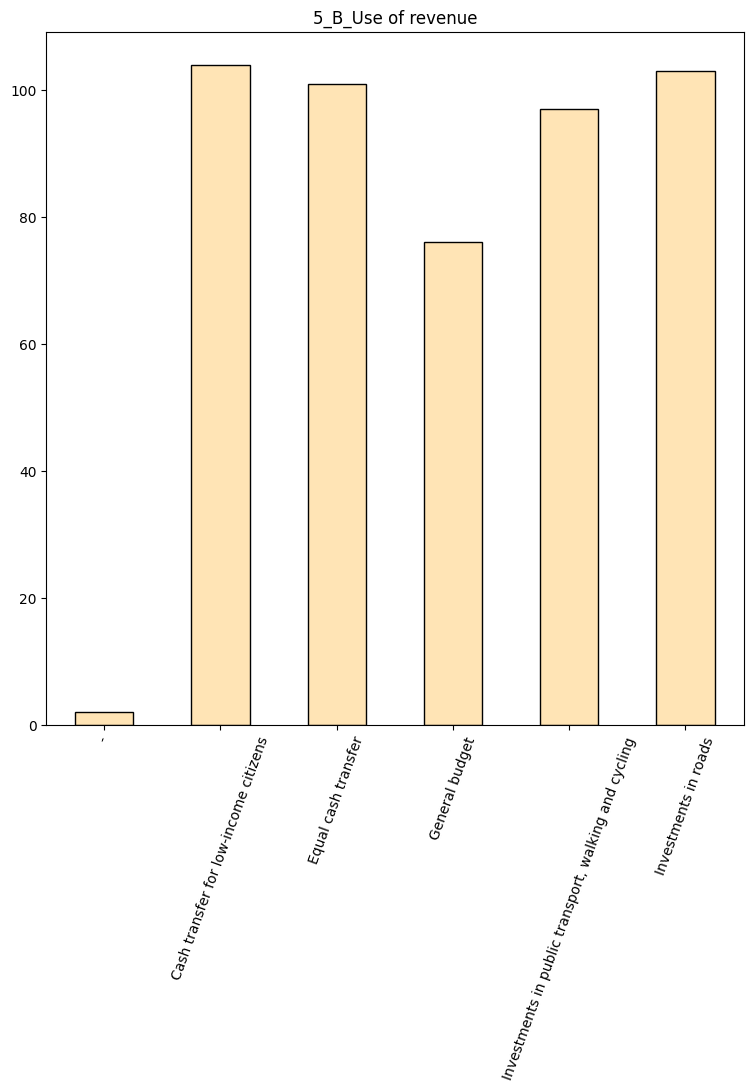

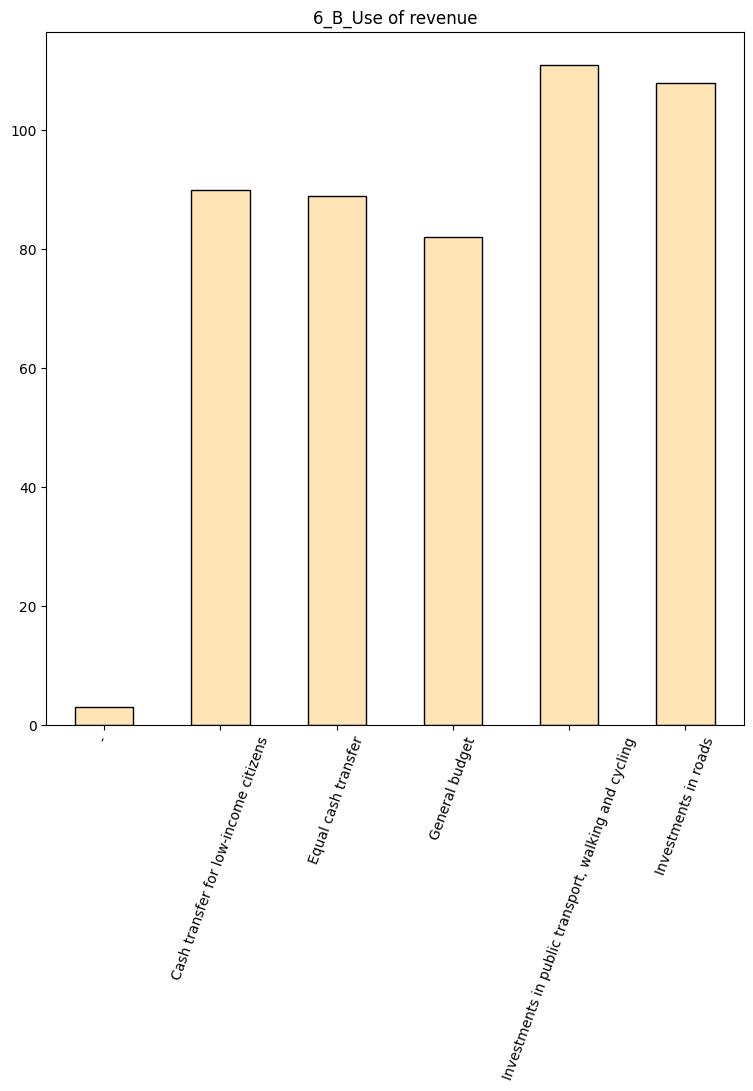

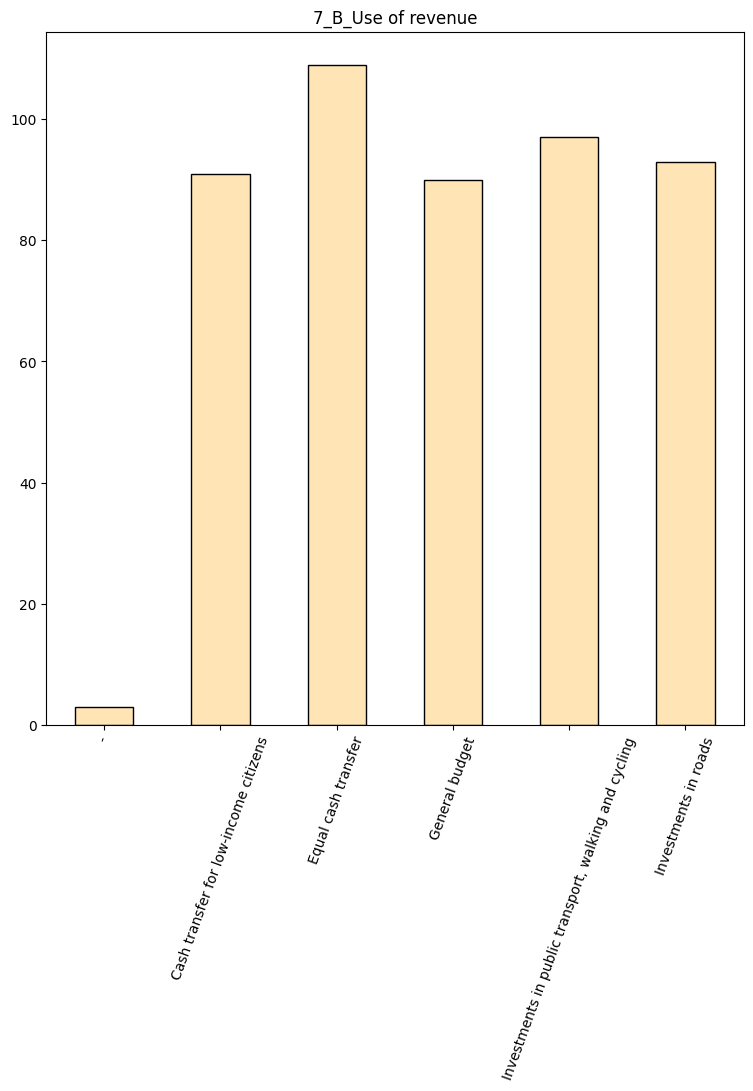

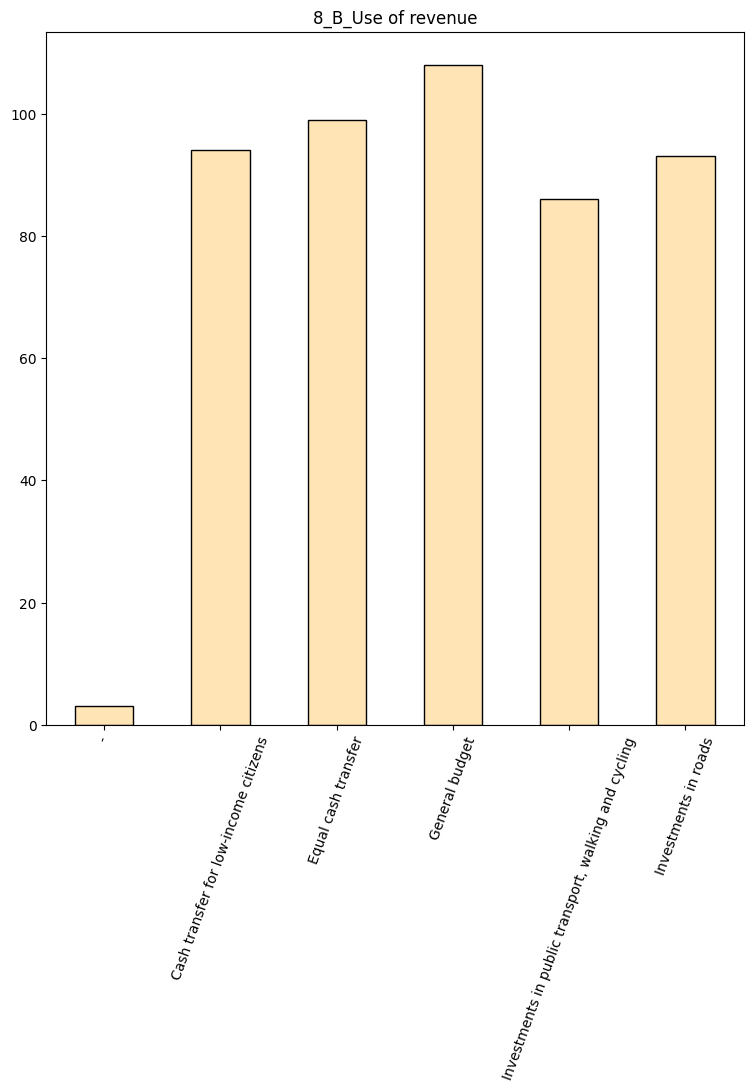

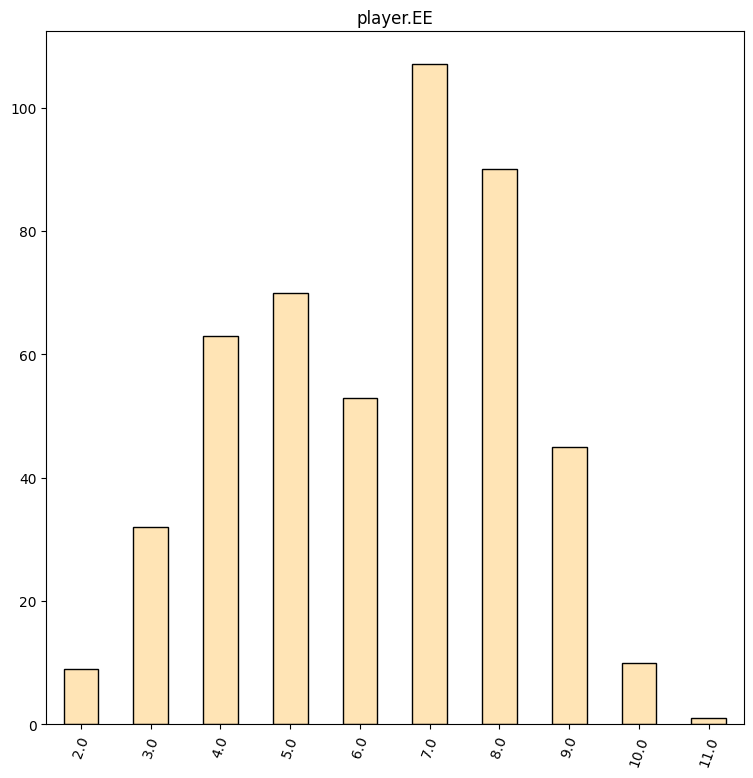

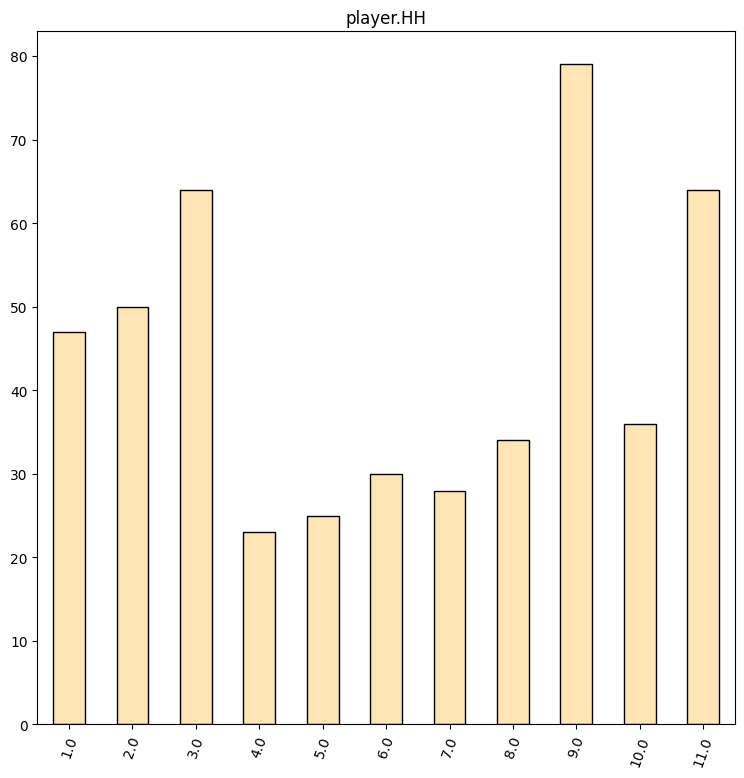

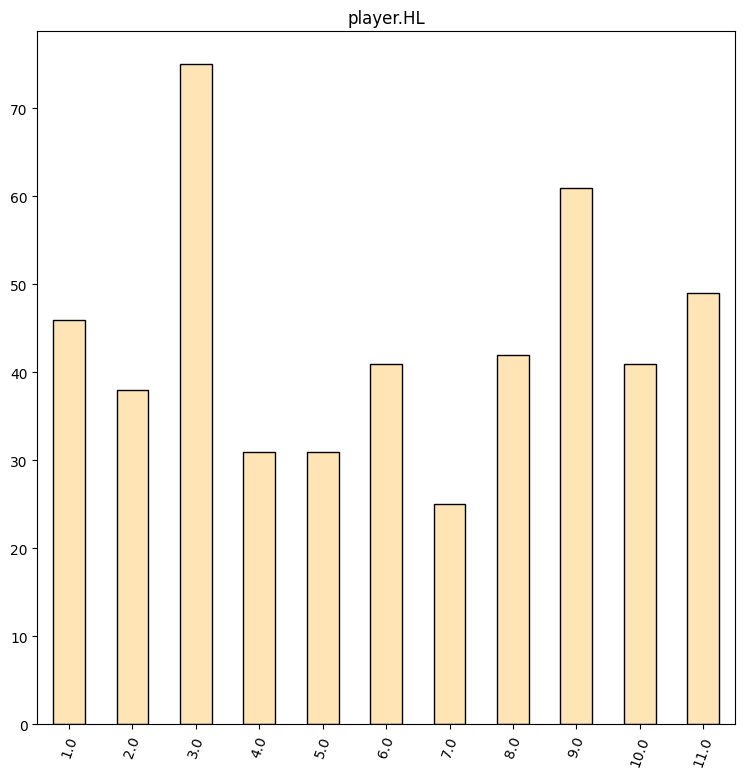

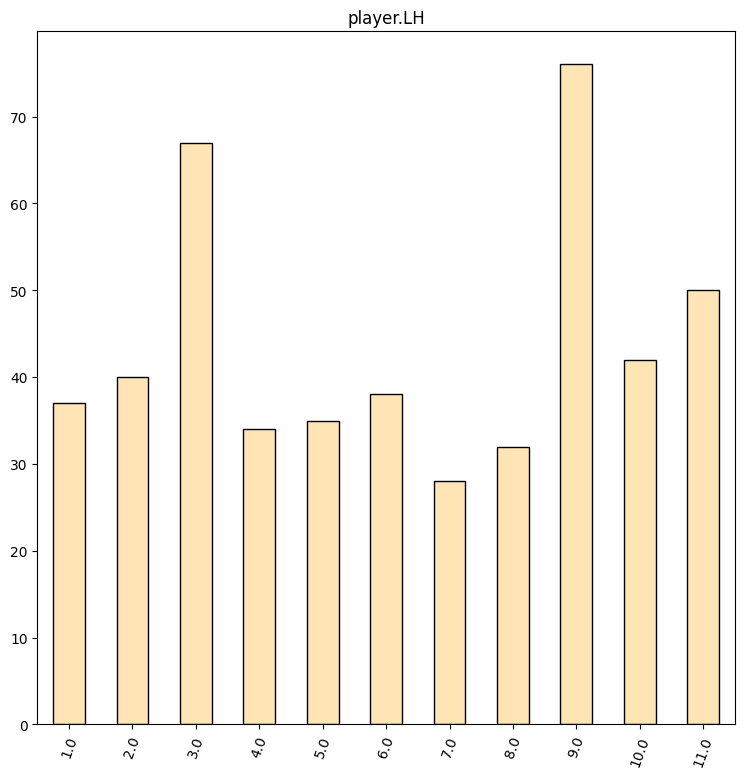

In [ ]:
for i in [9,13,15,19,21,23,25,26,28,31,33,36,38,40,42,44,209,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241]:
    column= df1.columns[i]
    
    df1.groupby([column]).count().plot(kind='bar', y=1, title=column, figsize=(9,9),color='moccasin', edgecolor='k', legend=False)
    plt.xticks(rotation=70)
    plt.xlabel('')
    #plt.axis().set_xlabel('')
    #plt.figure(figsize=(9,9))
    #plt.tight_layout(pad=2, w_pad=8, h_pad=2)
    #plt.savefig('ABCharts_all_madrid%d.png' %i)
    plt.show()

In [ ]:
df1=df1.rename(columns={"How much do you personally trust the following institutions from 1 to 7, where 1 means ‘No trust at all’ and 7 means ‘Trust compltely’? Parlament: ": "Parlament","County council:":"County council","Government:": "Government", "National politicians:":"National politicians", "Political parties: ":"Political parties"})

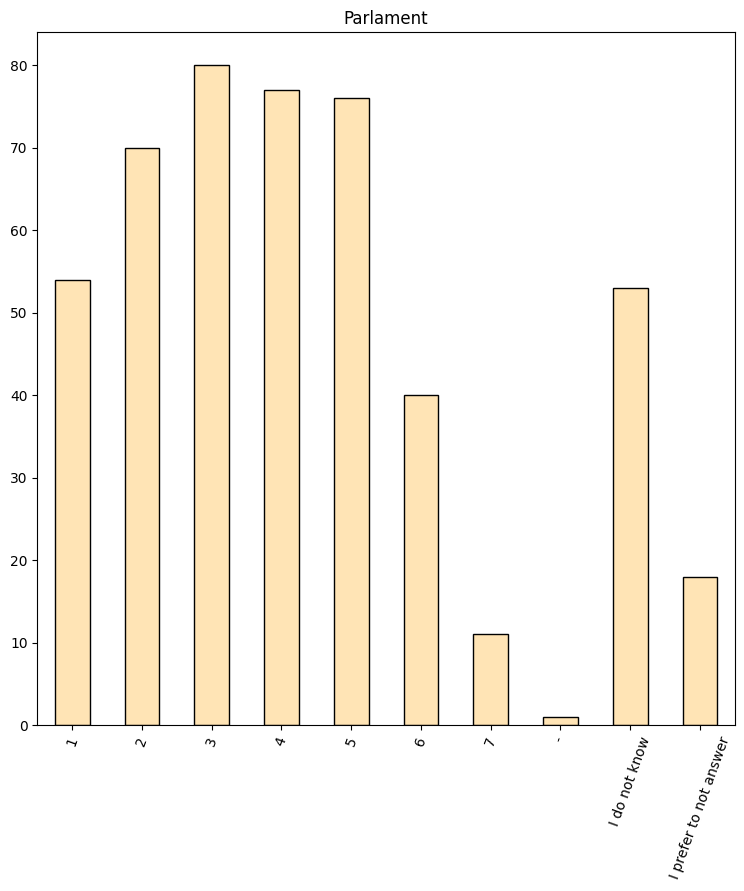

In [ ]:
column= 'Parlament'
    
df1.groupby([column]).count().plot(kind='bar', y=1, title=column, figsize=(9,9),color='moccasin', edgecolor='k', legend=False)
plt.xticks(rotation=70)
plt.xlabel('')

plt.show()

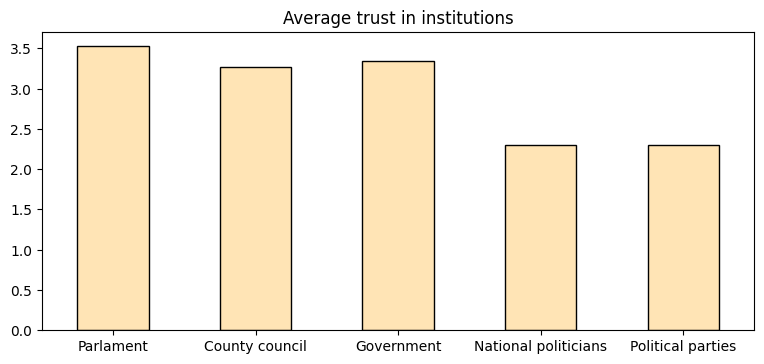

In [ ]:
# for columns Parlamet, County council, Government, National politicians, Political parties compute the average trust and plot it
columns = ['Parlament','County council','Government','National politicians','Political parties']
df1[columns] = df1[columns].apply(pd.to_numeric, errors='coerce', axis=1)
df1[columns].mean().plot(kind='bar', figsize=(8,4), color='moccasin', edgecolor='k', legend=False)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Average trust in institutions')
plt.tight_layout(pad=2, w_pad=8, h_pad=2)
plt.show()

In [ ]:
df1

,participant.code,treatment,participant.id_in_session,player.municipality_home,What is the municipality of your home address?,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,player.car_type,What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most.,player.buy_car_type,Are you planning to buy a car in the next year?,player.access_to_bike,Do you own or have access to a bike (electric or regular)?,player.access_to_motorbyke,Do you own or have access to a motorbyke?,player.access_to_scooter,Do you own or have access to a e-scooter?,player.employ_status,What is your employment status?,player.municipality_destination,Where is the destination of this trip? (municipality),player.trip_purpose,What is the purpose/destination of this trip?,player.trip_other,player.trip_moment,At what time of the day do you typically travel?,player.trip_mode,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,player.mode_other,player.trip_traffic,How are the traffic conditions normally on the trip?,player.trip_time,What is the approximate travel time of this trip (one way)?,player.trip_cost,"What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip.",player.trip_tolls,player.trip_alternative_mode,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",player.trip_alternative_rate,How would you rate your alternative?,player.trip_alternative_justification,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,How fair do you think the wealth distribution is in your country?,session.code,control_question1,control_question2,attributes_binary_1,attributes_binary_2,attributes_binary_3,attributes_binary_4,attributes_binary_5,1_alternative1,1_policy_choice,1_What is your preferred policy type?,2_policy_choice,2_What is your preferred policy type?,3_policy_choice,3_What is your preferred policy type?,4_policy_choice,4_What is your preferred policy type?,5_policy_choice,5_What is your preferred policy type?,6_policy_choice,6_What is your preferred policy type?,7_policy_choice,7_What is your preferred policy type?,8_policy_choice,8_What is your preferred policy type?,1_Price_UR_A,"1_A_Price in urban areas, rush hour",2_Price_UR_A,"2_A_Price in urban areas, rush hour",3_Price_UR_A,"3_A_Price in urban areas, rush hour",4_Price_UR_A,"4_A_Price in urban areas, rush hour",5_Price_UR_A,"5_A_Price in urban areas, rush hour",6_Price_UR_A,"6_A_Price in urban areas, rush hour",7_Price_UR_A,"7_A_Price in urban areas, rush hour",8_Price_UR_A,"8_A_Price in urban areas, rush hour",1_Price_UN_A,"1_A_Price in urban areas, outside rush hour",2_Price_UN_A,"2_A_Price in urban areas, outside rush hour",3_Price_UN_A,"3_A_Price in urban areas, outside rush hour",4_Price_UN_A,"4_A_Price in urban areas, outside rush hour",5_Price_UN_A,"5_A_Price in urban areas, outside rush hour",6_Price_UN_A,"6_A_Price in urban areas, outside rush hour",7_Price_UN_A,"7_A_Price in urban areas, outside rush hour",8_Price_UN_A,"8_A_Price in urban areas, outside rush hour",1_Price_O_A,1_A_Price outside urban areas,2_Price_O_A,2_A_Price outside urban areas,3_Price_O_A,3_A_Price outside urban areas,4_Price_O_A,4_A_Price outside urban areas,5_Price_O_A,5_A_Price outside urban areas,6_Price_O_A,6_A_Price outside urban areas,7_Price_O_A,7_A_Price outside urban areas,8_Price_O_A,8_A_Price outside urban areas,1_EV_A,1_A_Price for electric vehicles,2_EV_A,2_A_Price for electric vehicles,3_EV_A,3_A_Price for electric vehicles,4_EV_A,

In [ ]:
df1=df1.rename(columns={'How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:': "Air pollution", "The introduction of policies such as road pricing will alleviate congestion problems:":"Road pricing", "Revenues collected through taxes are used to create a well-functioning welfare state and society:":"Revenues", 'Tax revenues should be used to help those who are more in need:':'Tax','I think the overall tax level is too high:':'Tax lev'})


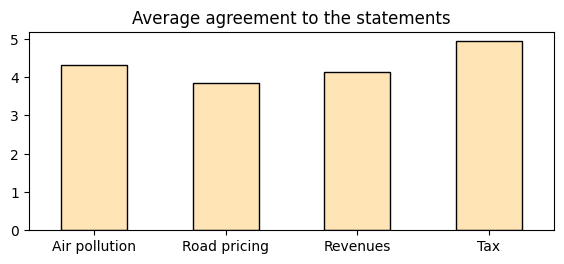

In [ ]:
columns = ['Air pollution','Road pricing','Revenues','Tax']
df1[columns] = df1[columns].apply(pd.to_numeric, errors='coerce', axis=1)
df1[columns].mean().plot(kind='bar', figsize=(6,3), color='moccasin', edgecolor='k', legend=False)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Average agreement to the statements')
plt.tight_layout(pad=2, w_pad=8, h_pad=2)
plt.show()

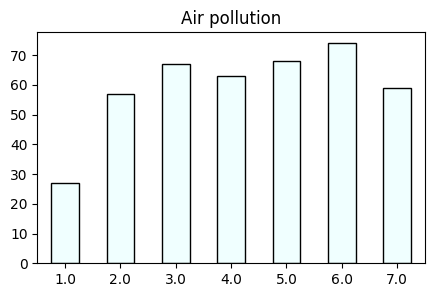

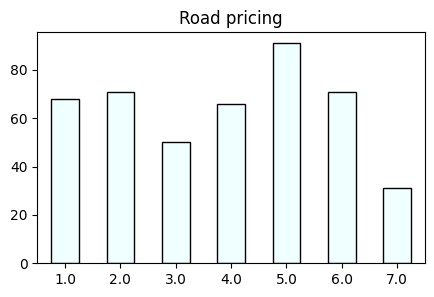

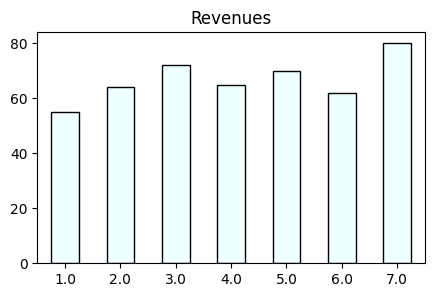

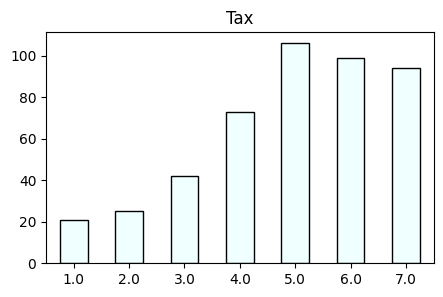

In [ ]:
for i in ['Air pollution','Road pricing','Revenues','Tax']:
    column= i
    
    df1.groupby([column]).count().plot(kind='bar', y=1, title=column, figsize=(5,3),color='azure', edgecolor='k', legend=False)
    plt.xticks(rotation=0)
    plt.xlabel('')

    #plt.savefig('BCharts_all_%d.png' %i)
    plt.show()

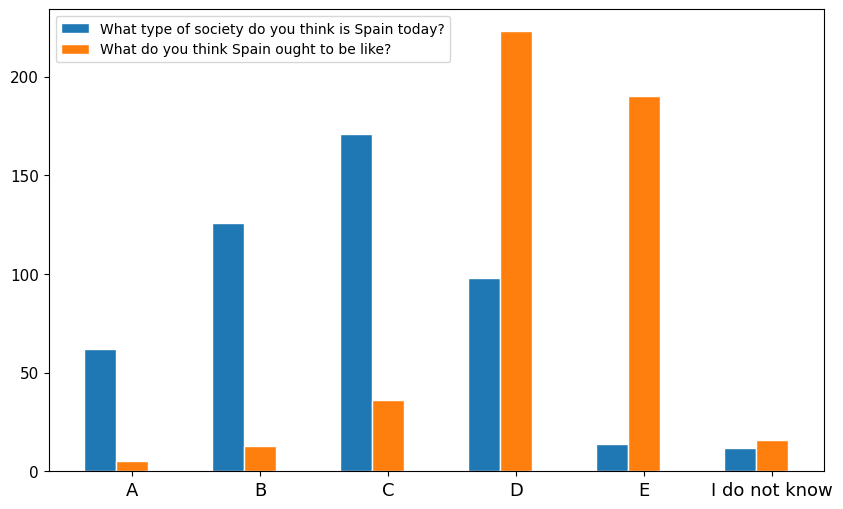

In [ ]:
lst=['A', 'B', 'C', 'D', 'E','I do not know']

fig=plt.figure(figsize=(10,6))
barWidth = 0.25

bars1=df1.groupby([df1['What type of society do you think is Spain today – which diagram comes the closest?']]).count()['treatment'].loc[lst].tolist()
bars2=df1.groupby([df1['What do you think Spain ought to be like – which would you prefer?']]).count()['treatment'].loc[lst].tolist()

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='What type of society do you think is Spain today?')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='What do you think Spain ought to be like?')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E','I do not know'], fontsize=13)
plt.yticks(fontsize=11)
plt.legend()

#plt.savefig("table_Madrid.pdf")
plt.show()

In [ ]:
new=df1.groupby(['By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.','If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?'])
chord=new.size().reset_index(name="Time")
#chord.to_excel("chord_madrid.xlsx") 

In [ ]:
# List of columns related to gender, age, and similar questions
columns_of_interest = ['How do you identify as?', 'Which year were you born?', 'How many children under the age of 15 live with you?', 'What is your income per year?', 'What is your employment status?']  # Replace with actual column names

# Calculate the statistics
statistics = df1[columns_of_interest].agg(['mean', 'max', 'min', 'count']).transpose()

# Rename the columns for clarity
statistics.columns = ['Mean', 'Maximum', 'Minimum', 'Total Number']

# Display the statistics table
print(statistics)

TypeError: can only concatenate str (not "int") to str